<a href="https://colab.research.google.com/github/Astrocitos/TeamML/blob/main/SVM_Equipo02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

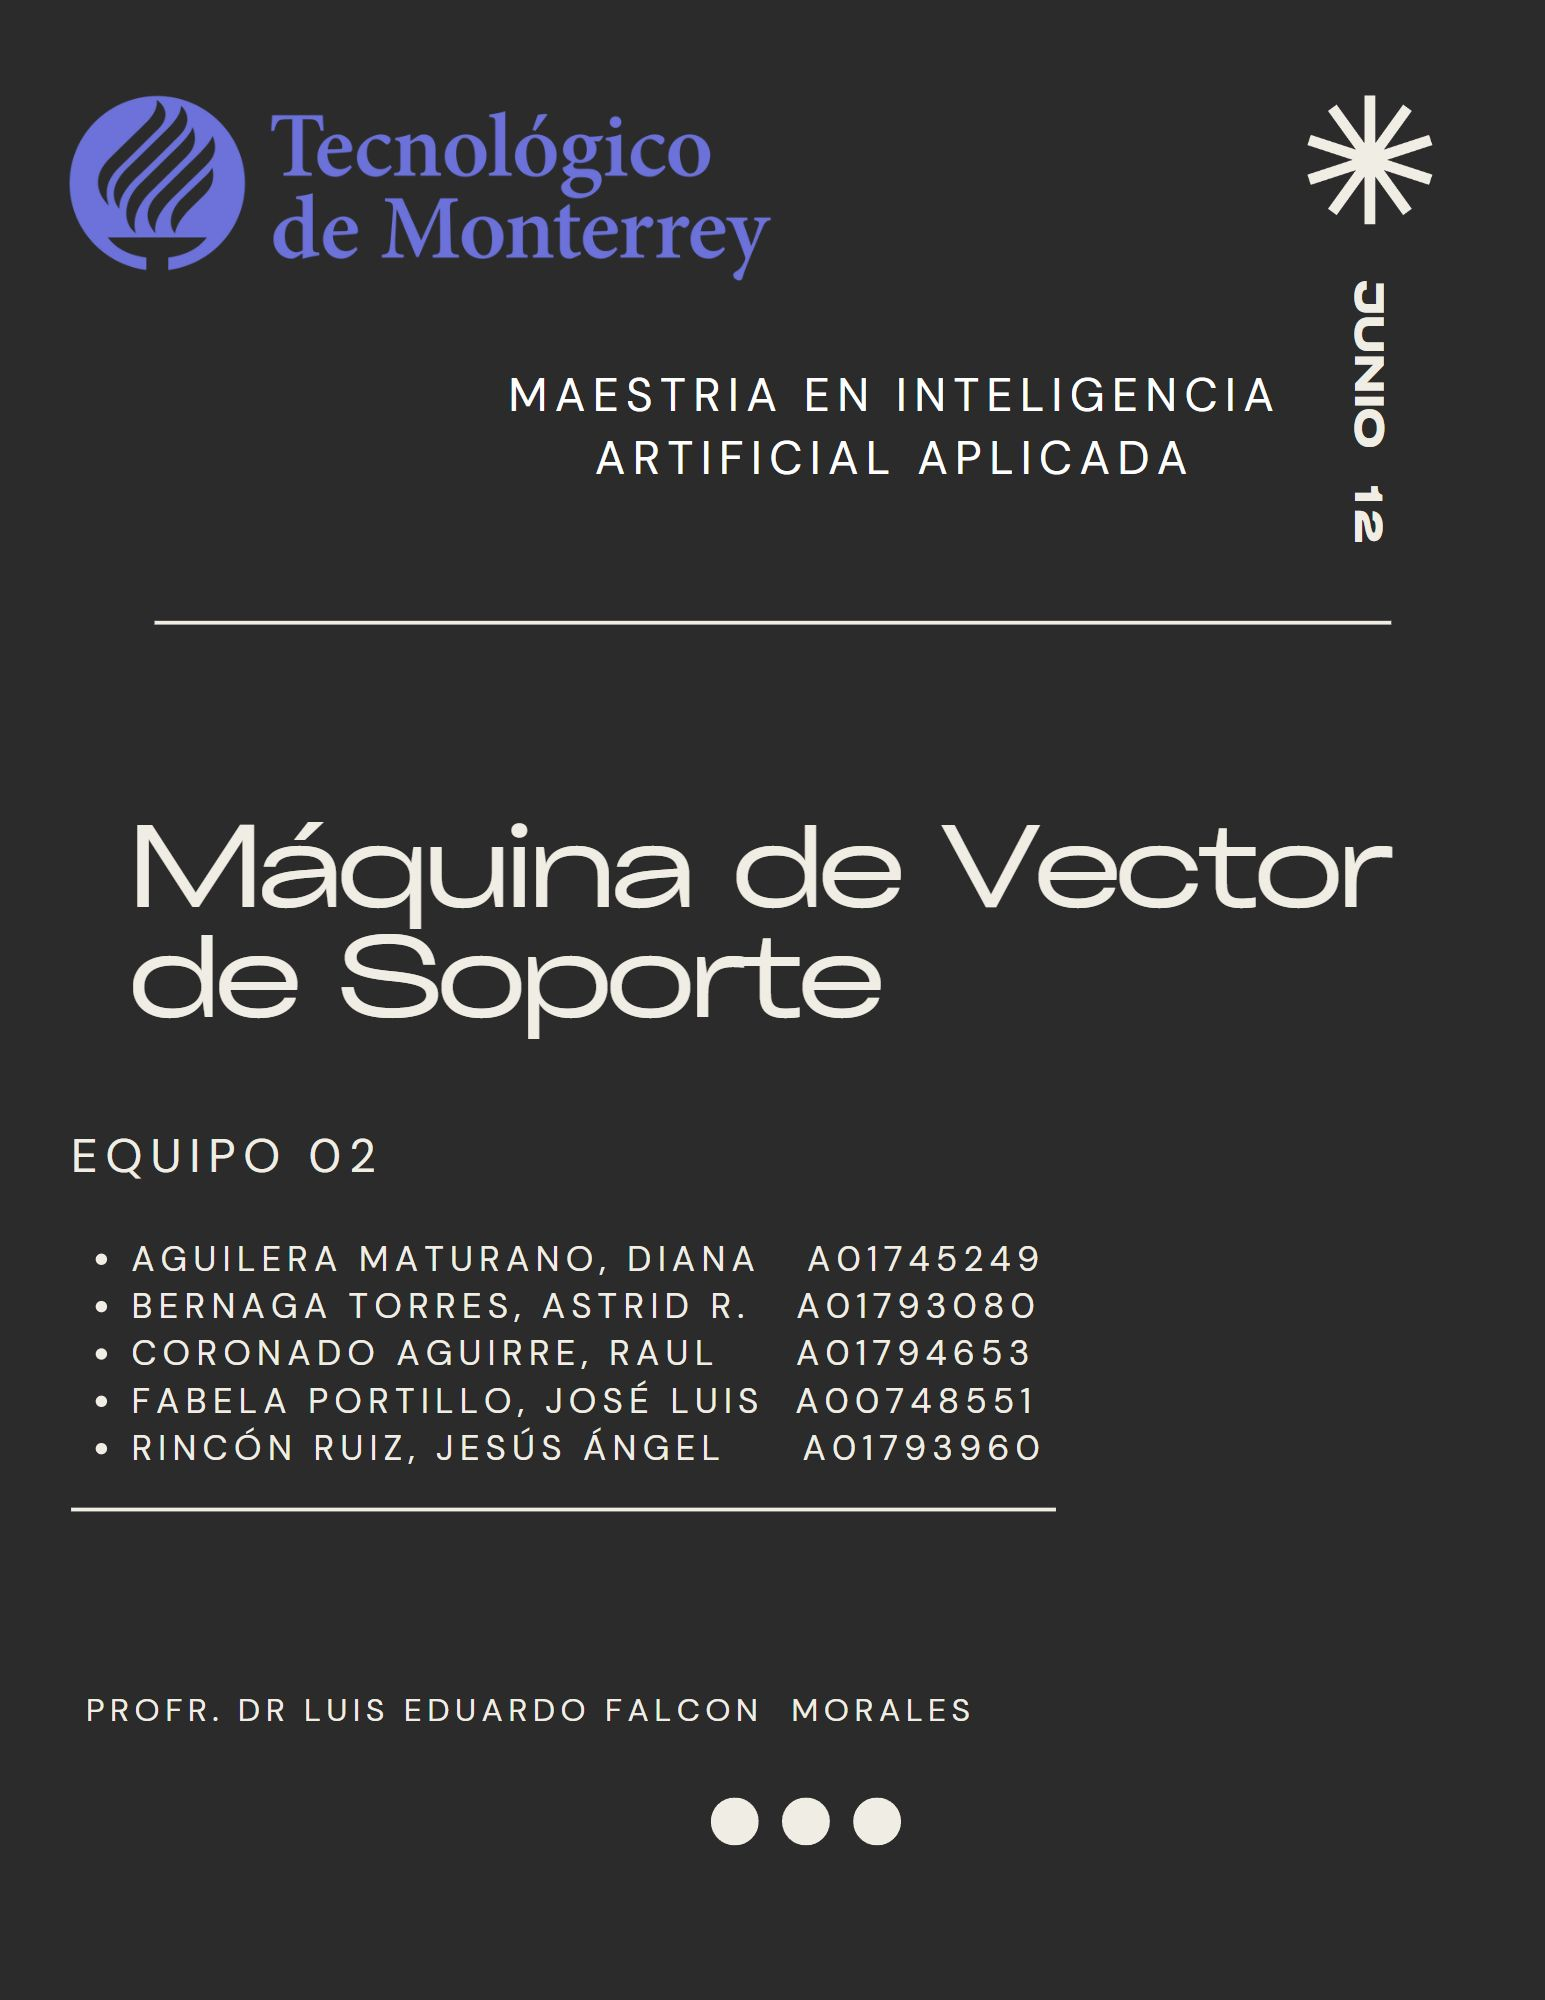

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Importación de librerías necesarias para el análisis de datos y modelado
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
import time

# Importación de clases y funciones específicas de scikit-learn
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_validate, GridSearchCV, learning_curve, validation_curve, RepeatedStratifiedKFold,ShuffleSplit
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler, FunctionTransformer, PowerTransformer, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn import svm, datasets, preprocessing
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, accuracy_score, f1_score, precision_score, confusion_matrix, classification_report, make_scorer, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.svm import SVC
from scipy import stats

# Importación de librerías específicas de imbalanced-learn
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced

#**Análisis y Preprocesamiento**

In [ ]:
# Carga del conjunto de datos
url = "https://raw.githubusercontent.com/JorgeRamos01/Random-matrices-6/master/australian.csv"

df = pd.read_csv(url)

df

,X1,X2,X3,X4,X5,X6,X7,X7.1,X9,X10,X11,X12,X13,X14,Y
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [ ]:
df.isna().sum()

X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X7      0
X7.1    0
X9      0
X10     0
X11     0
X12     0
X13     0
X14     0
Y       0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,690.0,0.678261,0.467482,0.00,0.000,1.000,1.0000,1.00
X2,690.0,31.568203,11.853273,13.75,22.670,28.625,37.7075,80.25
X3,690.0,4.758725,4.978163,0.00,1.000,2.750,7.2075,28.00
X4,690.0,1.766667,0.430063,1.00,2.000,2.000,2.0000,3.00
X5,690.0,7.372464,3.683265,1.00,4.000,8.000,10.0000,14.00
X6,690.0,4.692754,1.992316,1.00,4.000,4.000,5.0000,9.00
X7,690.0,2.223406,3.346513,0.00,0.165,1.000,2.6250,28.50
X7.1,690.0,0.523188,0.499824,0.00,0.000,1.000,1.0000,1.00
X9,690.0,0.427536,0.495080,0.00,0.000,0.000,1.0000,1.00
X10,690.0,2.400000,4.862940,0.00,0.000,0.000,3.0000,67.00


array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>,
        <Axes: title={'center': 'X3'}>, <Axes: title={'center': 'X4'}>],
       [<Axes: title={'center': 'X5'}>, <Axes: title={'center': 'X6'}>,
        <Axes: title={'center': 'X7'}>, <Axes: title={'center': 'X7.1'}>],
       [<Axes: title={'center': 'X9'}>, <Axes: title={'center': 'X10'}>,
        <Axes: title={'center': 'X11'}>, <Axes: title={'center': 'X12'}>],
       [<Axes: title={'center': 'X13'}>, <Axes: title={'center': 'X14'}>,
        <Axes: title={'center': 'Y'}>, <Axes: >]], dtype=object)

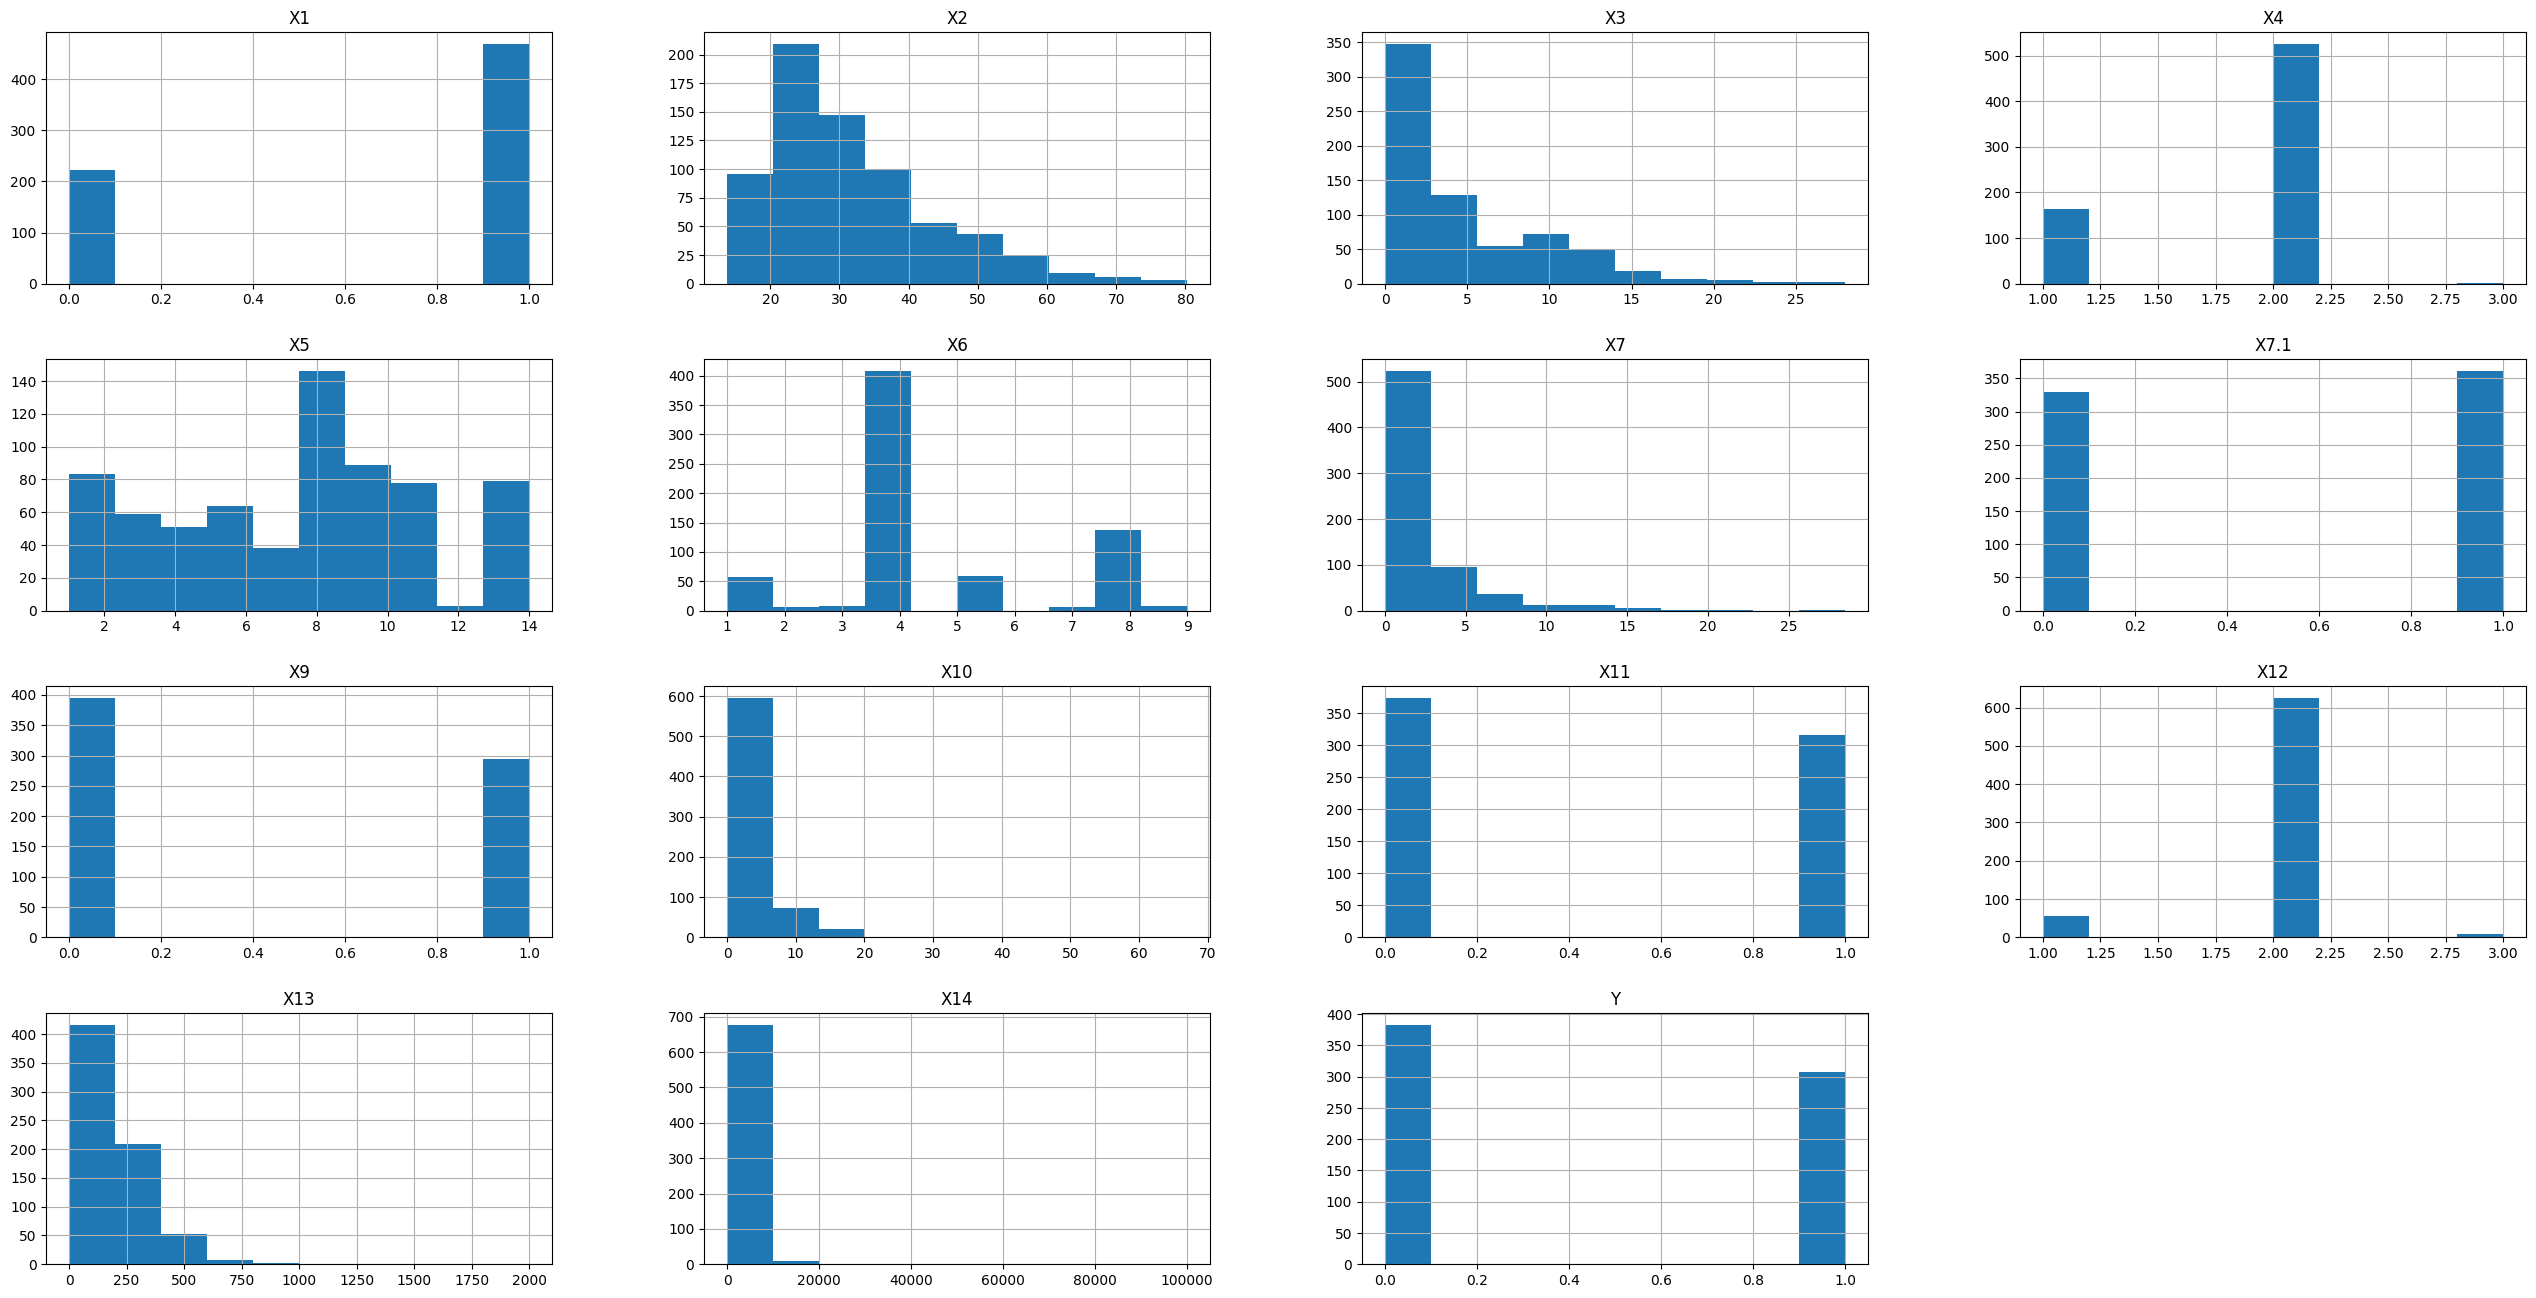

In [ ]:
df.hist(column=df.columns, figsize=(32,16))

Las variables continuas con sesgo a la derecha significan que tienen una distribución asimétrica, donde la mayoría de los valores se concentran hacia la izquierda y hay algunos valores extremadamente altos que se extienden hacia la derecha. Esto indica que hay una mayor concentración de datos en los valores más bajos y pocos valores muy altos.

Por otro lado, las variables categóricas que se deben convertir en variables ficticias son aquellas que representan diferentes categorías o opciones. Al convertirlas en variables ficticias, creamos una nueva columna para cada categoría y asignamos un valor de 1 o 0 para indicar si una observación pertenece o no a esa categoría.

En algunos casos, algunas categorías pueden tener una presencia muy baja o casi siempre se centran en una opción en particular, lo que significa que no aportan mucha variabilidad o información adicional al conjunto de datos. Esto puede ocurrir cuando una categoría es dominante y las otras categorías tienen una frecuencia muy baja.

In [ ]:
# Obtener las variables categóricas que deseas convertir en dummies
columnas_categoricas = ["X6", "X4", "X5", "X12"]

# Crear las columnas dummies para cada variable categórica
a6_dummies = pd.get_dummies(df["X6"])
a4_dummies = pd.get_dummies(df["X4"])
a5_dummies = pd.get_dummies(df["X5"])
a12_dummies = pd.get_dummies(df["X12"])

# Cambiar los nombres de las columnas dummies según el formato deseado
a6_dummies.columns = ["A6_1", "A6_2", "A6_3", "A6_4", "A6_5", "A6_7", "A6_8", "A6_9"]
a4_dummies.columns = ["A4_1", "A4_2", "A4_3"]
a5_dummies.columns = ["A5_1", "A5_2", "A5_3", "A5_4", "A5_5", "A5_6", "A5_7", "A5_8", "A5_9",
                      "A5_10", "A5_11", "A5_12", "A5_13", "A5_14"]
a12_dummies.columns = ["A12_1", "A12_2", "A12_3"]

# Realizar el merge de las variables dummies con el dataset original
df = df.merge(a6_dummies, left_index=True, right_index=True, how="inner")
df = df.merge(a4_dummies, left_index=True, right_index=True, how="inner")
df = df.merge(a5_dummies, left_index=True, right_index=True, how="inner")
df = df.merge(a12_dummies, left_index=True, right_index=True, how="inner")

In [ ]:
df

,X1,X2,X3,X4,X5,X6,X7,X7.1,X9,X10,...,A5_8,A5_9,A5_10,A5_11,A5_12,A5_13,A5_14,A12_1,A12_2,A12_3
0,1,22.08,11.460,2,4,4,1.585,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,...,0,0,0,0,0,0,0,0,1,0
4,1,20.17,8.170,2,6,4,1.960,1,1,14,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,...,0,0,0,0,0,0,1,0,1,0
686,1,20.67,0.415,2,8,4,0.125,0,0,0,...,1,0,0,0,0,0,0,0,1,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,...,0,0,0,0,0,0,0,0,1,0
688,0,27.42,14.500,2,14,8,3.085,1,1,1,...,0,0,0,0,0,0,1,0,1,0


array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>,
        <Axes: title={'center': 'X3'}>, <Axes: title={'center': 'X4'}>,
        <Axes: title={'center': 'X5'}>, <Axes: title={'center': 'X6'}>,
        <Axes: title={'center': 'X7'}>],
       [<Axes: title={'center': 'X7.1'}>, <Axes: title={'center': 'X9'}>,
        <Axes: title={'center': 'X10'}>, <Axes: title={'center': 'X11'}>,
        <Axes: title={'center': 'X12'}>, <Axes: title={'center': 'X13'}>,
        <Axes: title={'center': 'X14'}>],
       [<Axes: title={'center': 'Y'}>, <Axes: title={'center': 'A6_1'}>,
        <Axes: title={'center': 'A6_2'}>,
        <Axes: title={'center': 'A6_3'}>,
        <Axes: title={'center': 'A6_4'}>,
        <Axes: title={'center': 'A6_5'}>,
        <Axes: title={'center': 'A6_7'}>],
       [<Axes: title={'center': 'A6_8'}>,
        <Axes: title={'center': 'A6_9'}>,
        <Axes: title={'center': 'A4_1'}>,
        <Axes: title={'center': 'A4_2'}>,
        <Axes: title={'cent

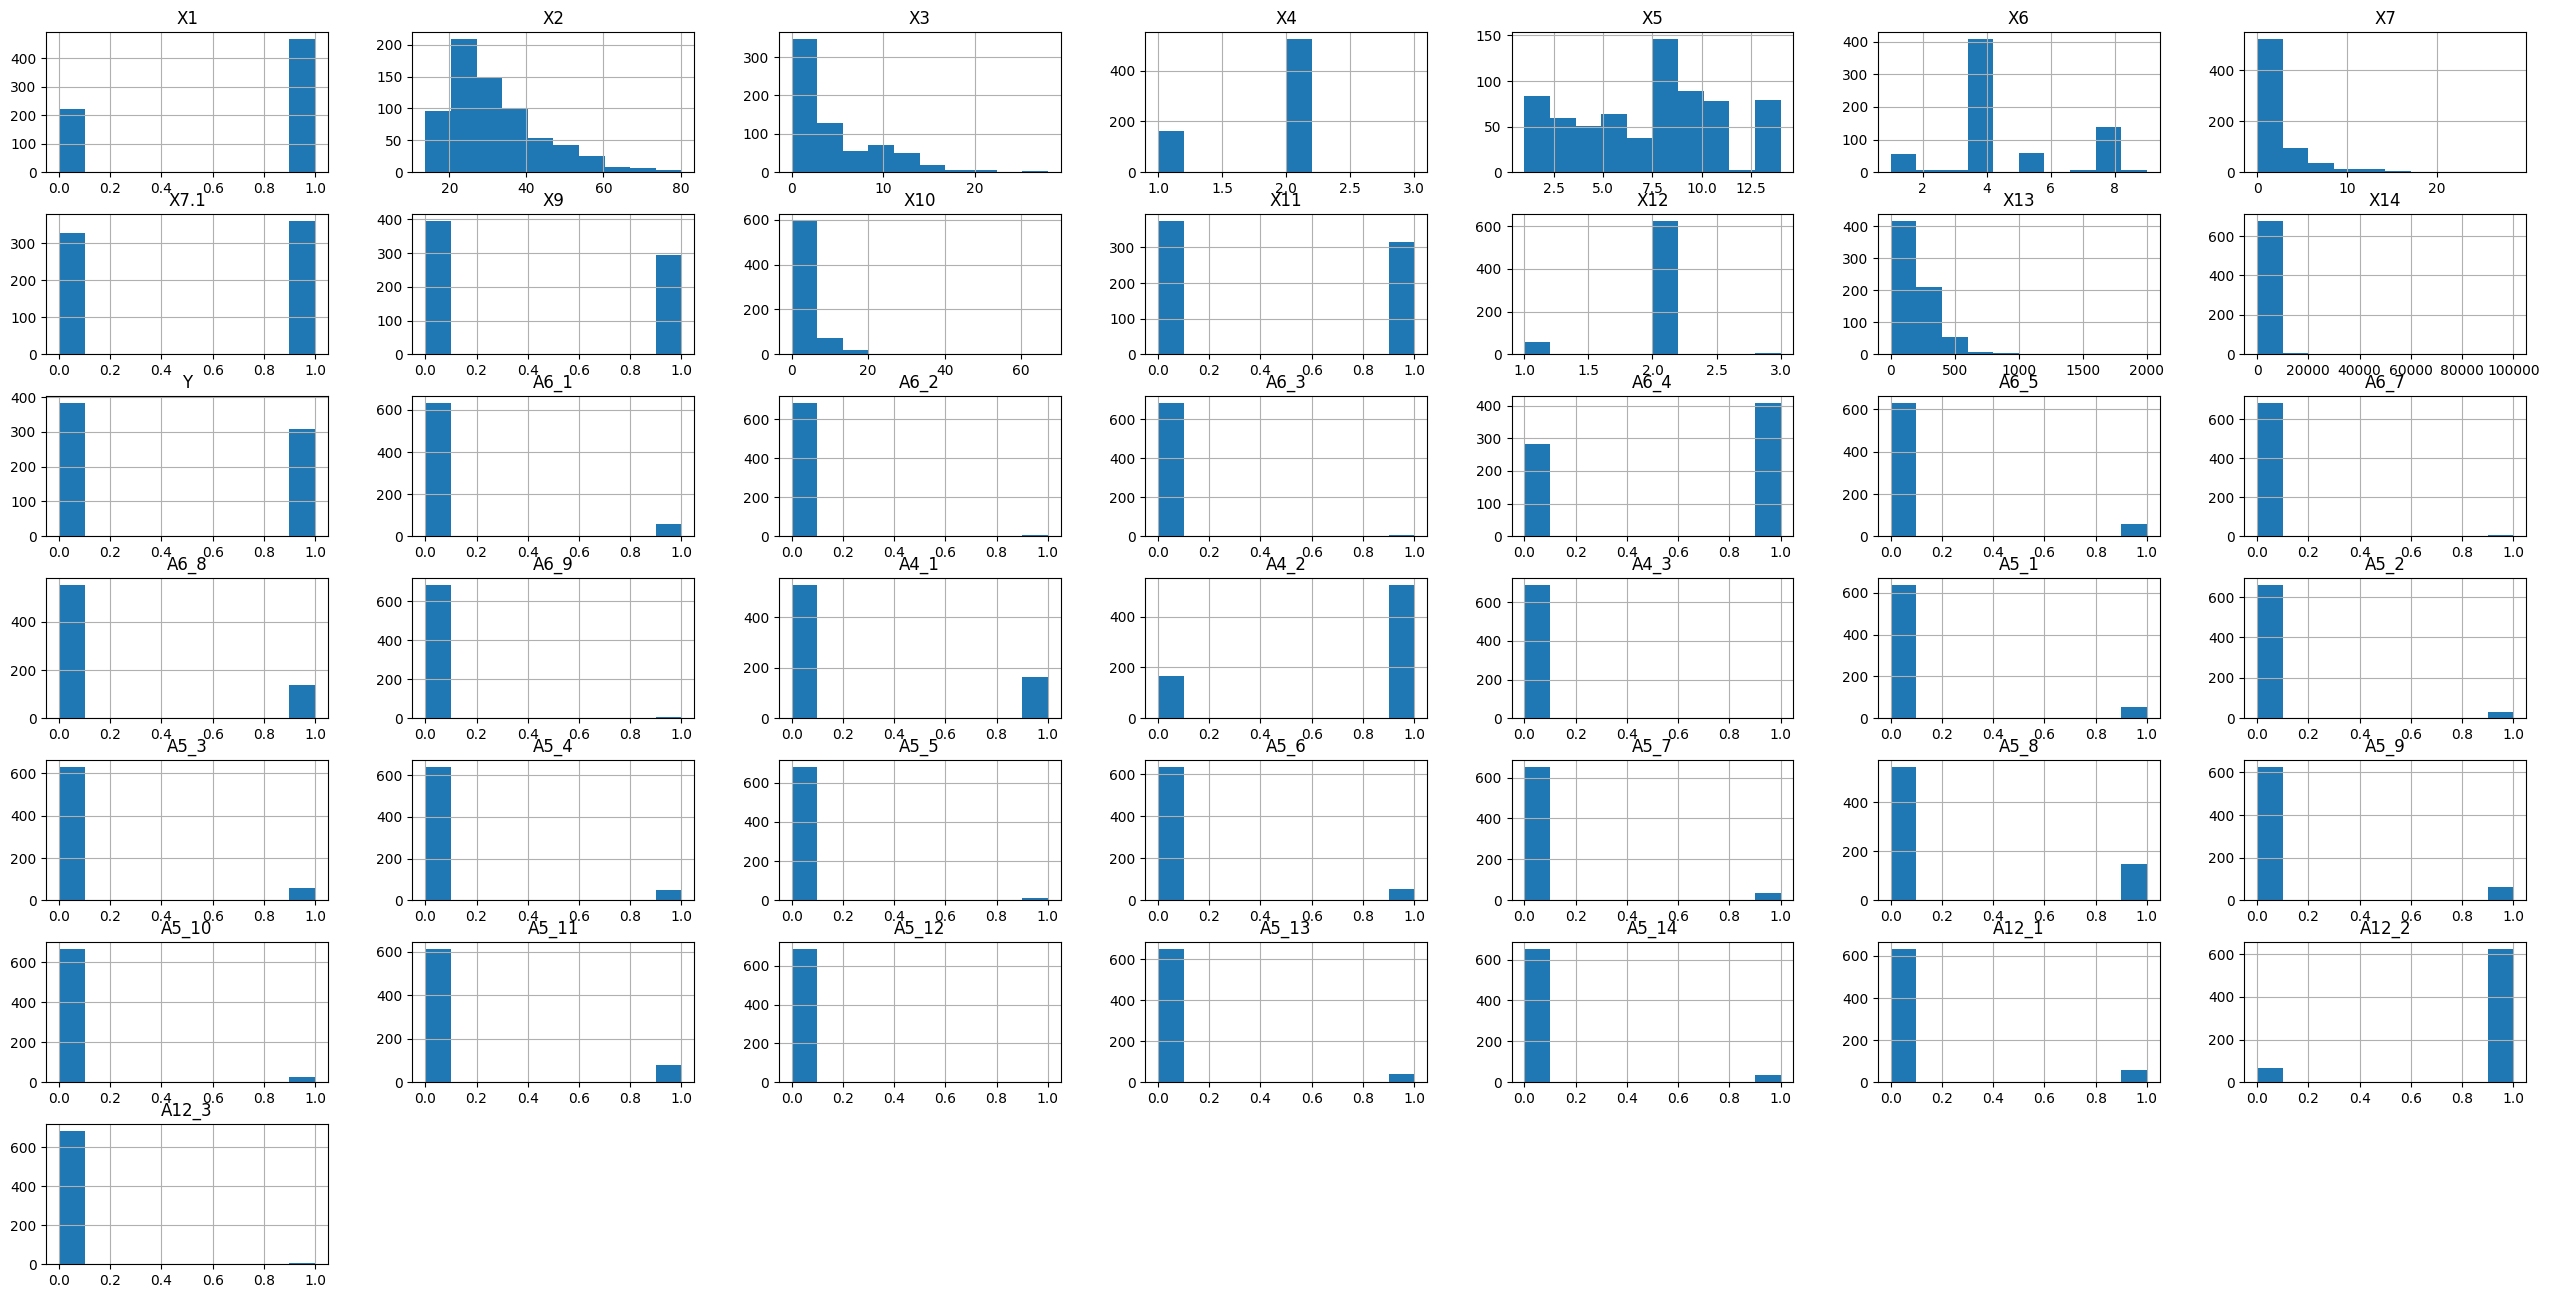

In [ ]:
df.hist(column=df.columns, figsize=(32,16))

In [ ]:
df=df.drop(['X6'], axis=1)
df=df.drop(['X4'], axis=1)
df=df.drop(['X5'], axis=1)
df=df.drop(['X12'], axis=1)

In [ ]:
df.var().sort_values(ascending=True)

A4_3     2.894344e-03
A5_12    4.335205e-03
A6_2     8.632549e-03
A6_7     8.632549e-03
A6_9     1.147641e-02
A12_3    1.147641e-02
A6_3     1.147641e-02
A5_5     1.430344e-02
A5_10    3.496982e-02
A5_2     4.164826e-02
A5_7     5.211502e-02
A5_14    5.211502e-02
A5_13    5.597064e-02
A5_4     6.854925e-02
A5_1     7.101449e-02
A5_6     7.224080e-02
A12_1    7.589449e-02
A6_1     7.589449e-02
A6_5     7.830925e-02
A5_3     7.830925e-02
A5_9     8.427252e-02
A12_2    8.545256e-02
A5_11    1.004102e-01
A6_8     1.602322e-01
A5_8     1.670642e-01
A4_1     1.806882e-01
A4_2     1.822111e-01
X1       2.185398e-01
A6_4     2.420143e-01
X9       2.451042e-01
Y        2.473255e-01
X11      2.485938e-01
X7.1     2.498244e-01
X7       1.119915e+01
X10      2.364819e+01
X3       2.478211e+01
X2       1.405001e+02
X13      2.963882e+04
X14      2.714517e+07
dtype: float64

Aqui se muestra la varianza de cada una de las variables en el dataframe, ordenadas de menor a mayor.

En este caso, los valores más cercanos a cero indican que esas variables tienen poca variabilidad, es decir, que la mayoría de los valores en esas variables tienden a ser similares o se concentran alrededor de un valor específico. Por otro lado, los valores más grandes indican que esas variables tienen una mayor dispersión, lo que significa que los valores están más alejados de su valor promedio.

Las variables con varianza cercana a cero, como A4_3, A5_12, A6_2, etc., son variables que tienen poca variabilidad y tienden a estar muy cerca de un valor específico. Esto sugiere que estas variables pueden no aportar mucha información discriminativa para el análisis o modelo que estamos construyendo.

Las variables con varianza más alta, como X7, X10, X3, X2, X13, X14, etc., son variables que presentan una mayor dispersión y una mayor variabilidad en los valores. Estas variables pueden tener una influencia más significativa en el análisis o modelo, ya que los valores se encuentran más dispersos y pueden contener información relevante.

In [ ]:
df

,X1,X2,X3,X7,X7.1,X9,X10,X11,X13,X14,...,A5_8,A5_9,A5_10,A5_11,A5_12,A5_13,A5_14,A12_1,A12_2,A12_3
0,1,22.08,11.460,1.585,0,0,0,1,100,1213,...,0,0,0,0,0,0,0,0,1,0
1,0,22.67,7.000,0.165,0,0,0,0,160,1,...,1,0,0,0,0,0,0,0,1,0
2,0,29.58,1.750,1.250,0,0,0,1,280,1,...,0,0,0,0,0,0,0,0,1,0
3,0,21.67,11.500,0.000,1,1,11,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,20.17,8.170,1.960,1,1,14,0,60,159,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,6.500,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
686,1,20.67,0.415,0.125,0,0,0,0,0,45,...,1,0,0,0,0,0,0,0,1,0
687,0,18.83,9.540,0.085,1,0,0,0,100,1,...,0,0,0,0,0,0,0,0,1,0
688,0,27.42,14.500,3.085,1,1,1,0,120,12,...,0,0,0,0,0,0,1,0,1,0


array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>,
        <Axes: title={'center': 'X3'}>, <Axes: title={'center': 'X7'}>,
        <Axes: title={'center': 'X7.1'}>, <Axes: title={'center': 'X9'}>],
       [<Axes: title={'center': 'X10'}>, <Axes: title={'center': 'X11'}>,
        <Axes: title={'center': 'X13'}>, <Axes: title={'center': 'X14'}>,
        <Axes: title={'center': 'Y'}>, <Axes: title={'center': 'A6_1'}>],
       [<Axes: title={'center': 'A6_2'}>,
        <Axes: title={'center': 'A6_3'}>,
        <Axes: title={'center': 'A6_4'}>,
        <Axes: title={'center': 'A6_5'}>,
        <Axes: title={'center': 'A6_7'}>,
        <Axes: title={'center': 'A6_8'}>],
       [<Axes: title={'center': 'A6_9'}>,
        <Axes: title={'center': 'A4_1'}>,
        <Axes: title={'center': 'A4_2'}>,
        <Axes: title={'center': 'A4_3'}>,
        <Axes: title={'center': 'A5_1'}>,
        <Axes: title={'center': 'A5_2'}>],
       [<Axes: title={'center': 'A5_3'}>,
        <Ax

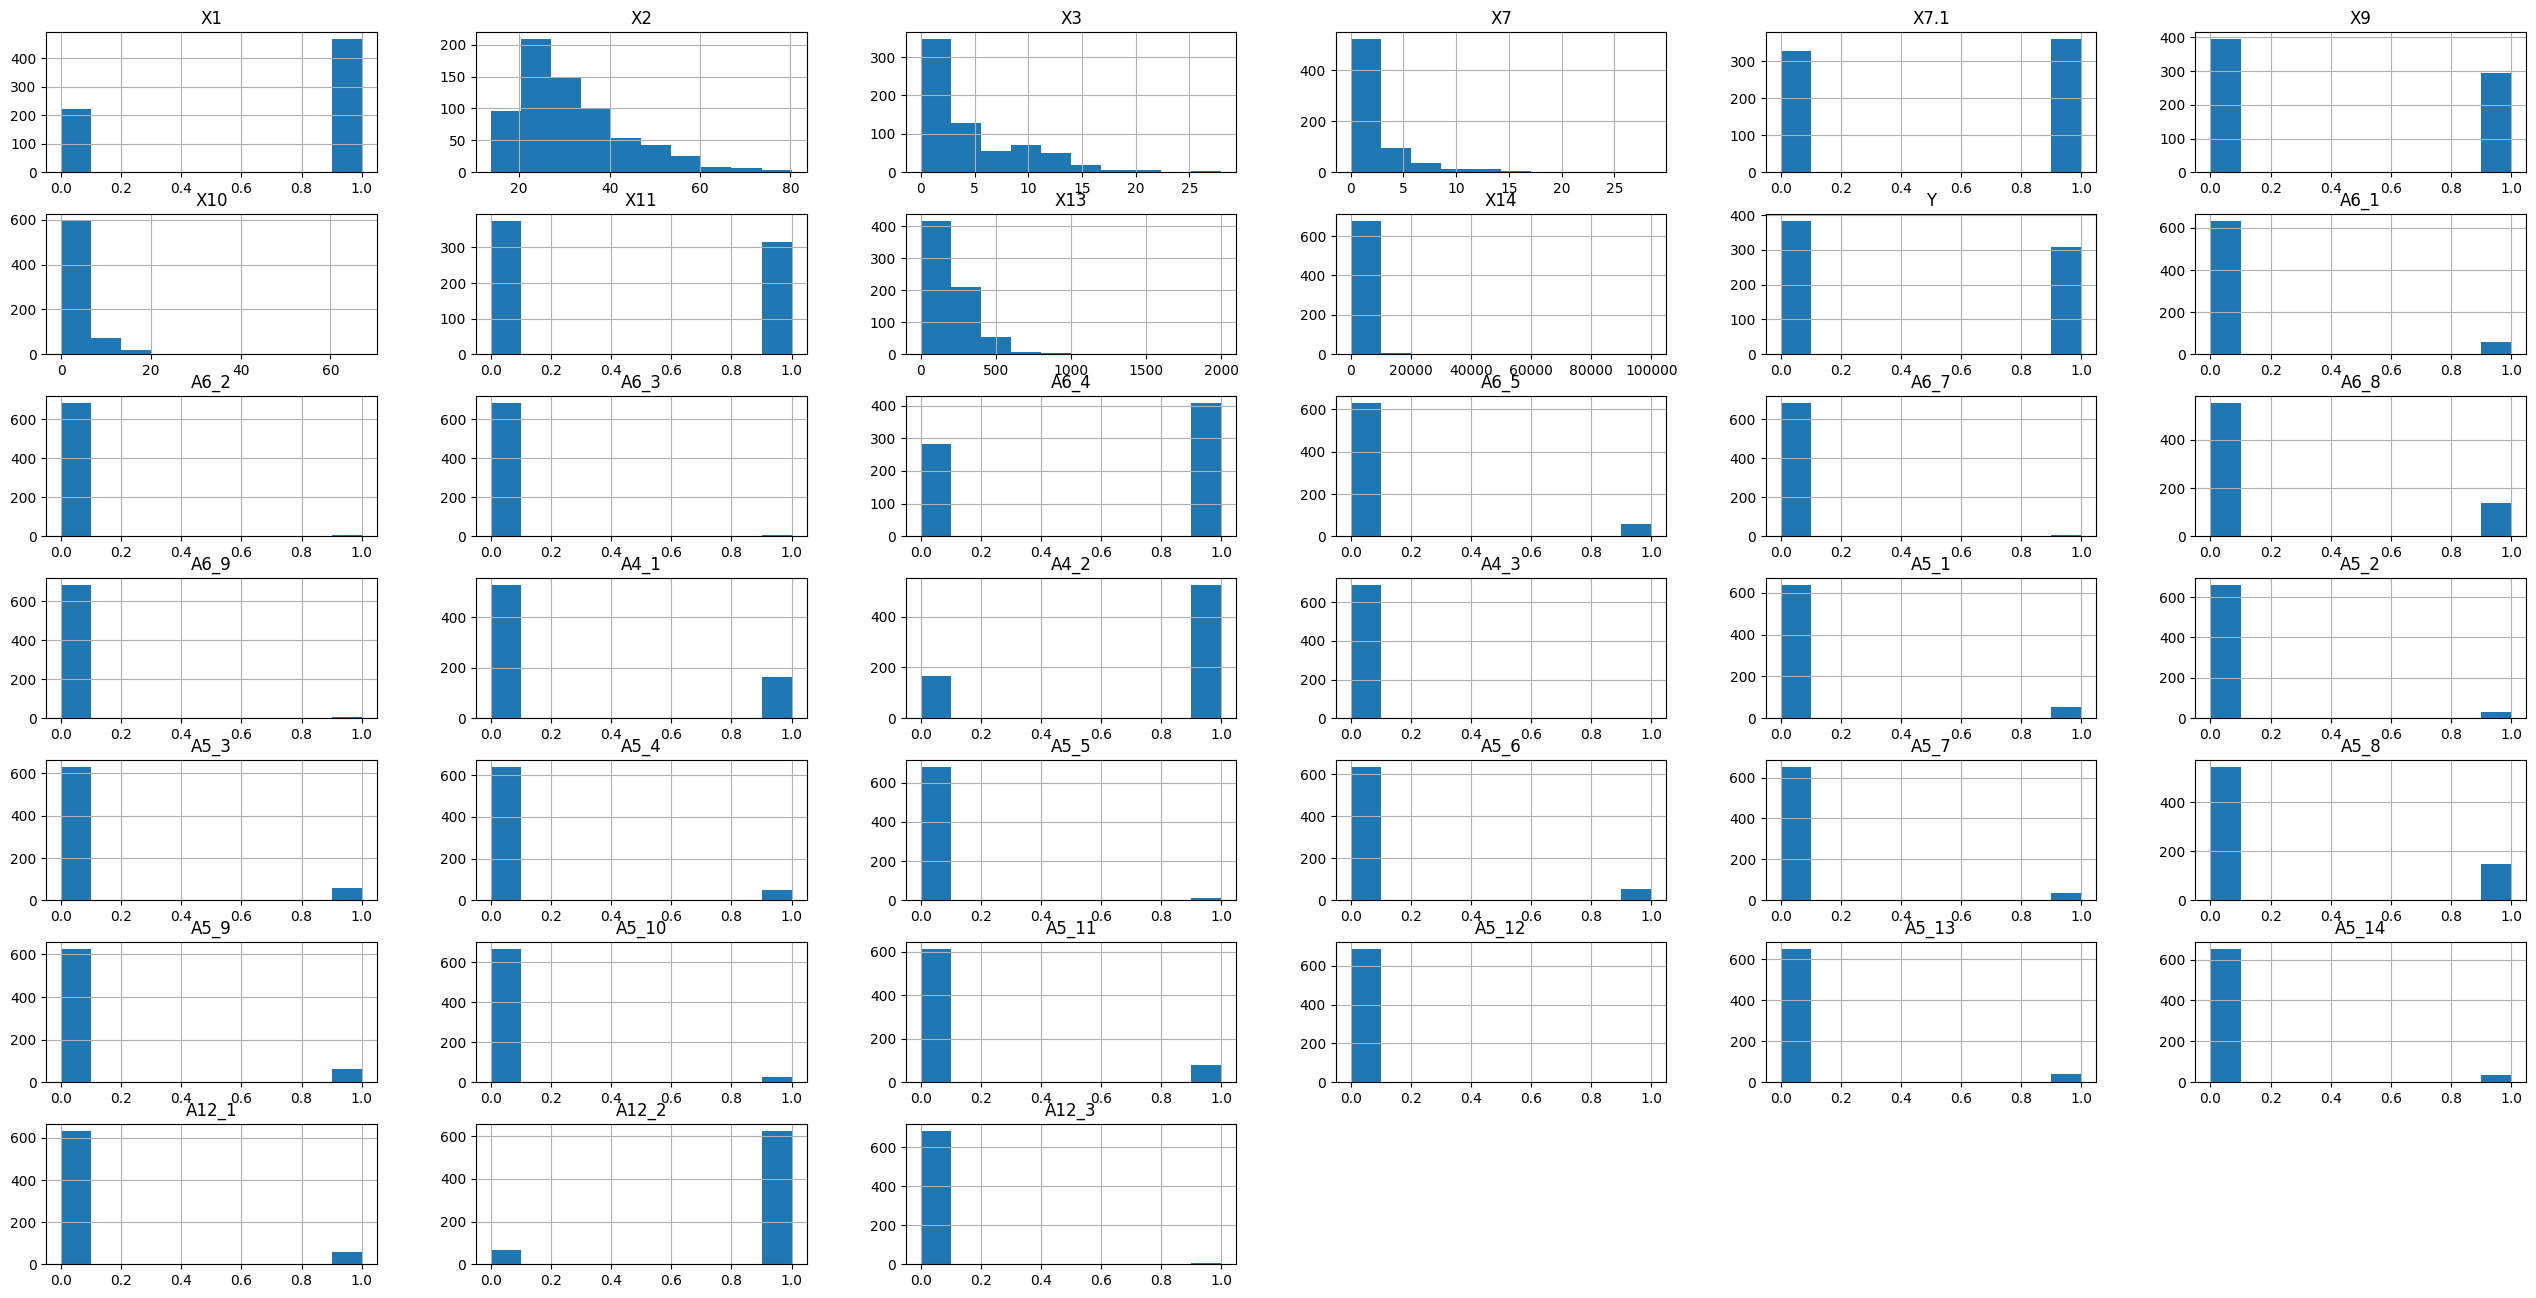

In [ ]:
df.hist(column=df.columns, figsize=(32,16))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5061cbb190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5061cbb6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5061cbaef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5061cbbc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5061cbbeb0>],
 'means': []}

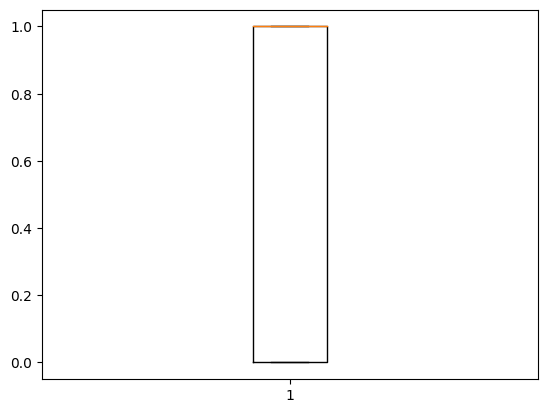

In [ ]:
plt.boxplot(df["X1"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5061b39390>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5061b398d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5061b390f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5061b39d80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5061b3a020>],
 'means': []}

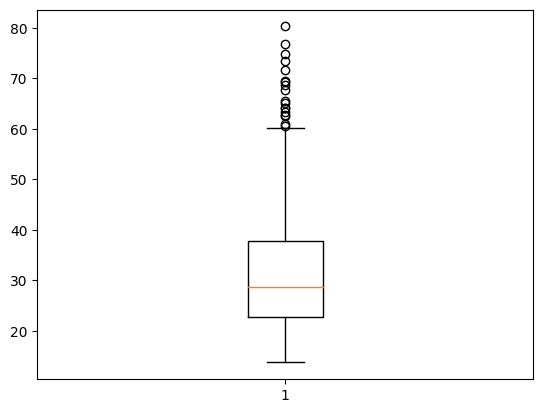

In [ ]:
plt.boxplot(df["X2"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5061b8b520>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5061b8ba60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5061b8b280>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5061b8bfa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5061bc4280>],
 'means': []}

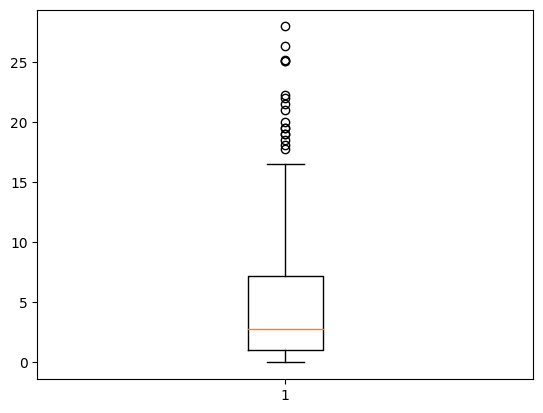

In [ ]:
plt.boxplot(df["X3"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5061a15420>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5061a15960>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5061a15180>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5061a15ea0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5061a16140>],
 'means': []}

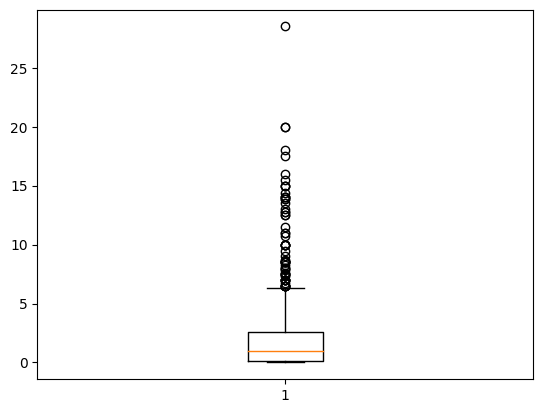

In [ ]:
plt.boxplot(df["X7"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5061a67610>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5061a67760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5061a67370>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5061a67c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5061a67eb0>],
 'means': []}

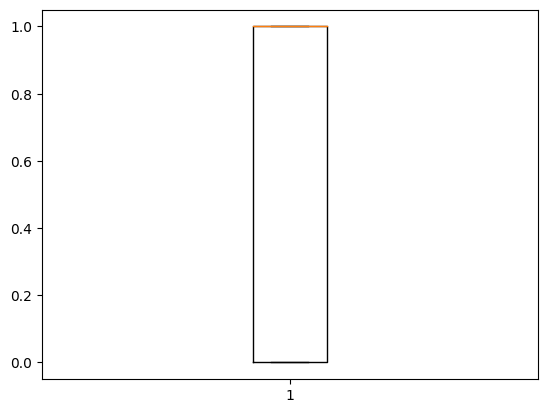

In [ ]:
plt.boxplot(df["X7.1"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5061aed390>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5061aed8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5061aed0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5061aede10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5061aee0b0>],
 'means': []}

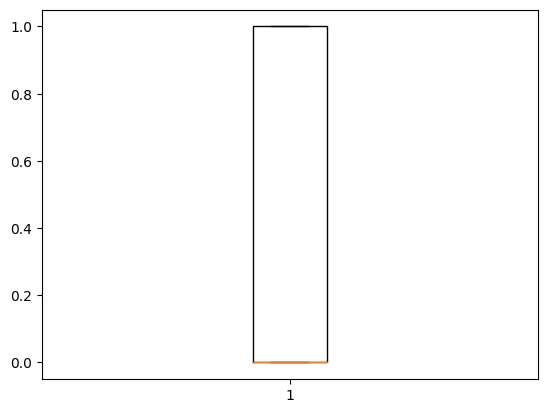

In [ ]:
plt.boxplot(df["X9"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f506194f4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f506194fa30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f506194f250>],
 'medians': [<matplotlib.lines.Line2D at 0x7f506194fe50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f506197c130>],
 'means': []}

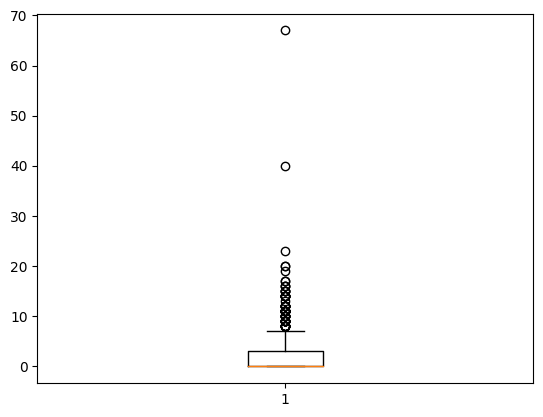

In [ ]:
plt.boxplot(df["X10"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f50619cd9f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f50619cdf30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f50619cd750>],
 'medians': [<matplotlib.lines.Line2D at 0x7f50619ce470>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f50619ce710>],
 'means': []}

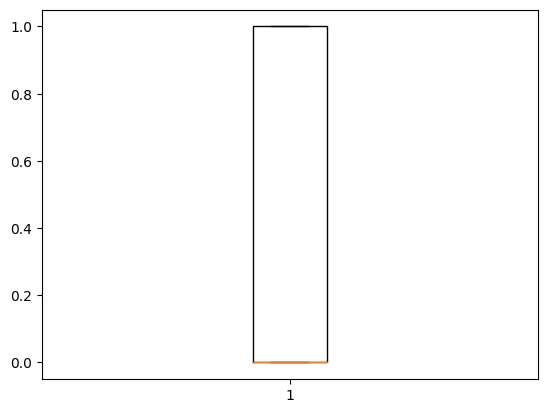

In [ ]:
plt.boxplot(df["X11"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5061823b80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5061823fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f50618238e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f506184c520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f506184c7c0>],
 'means': []}

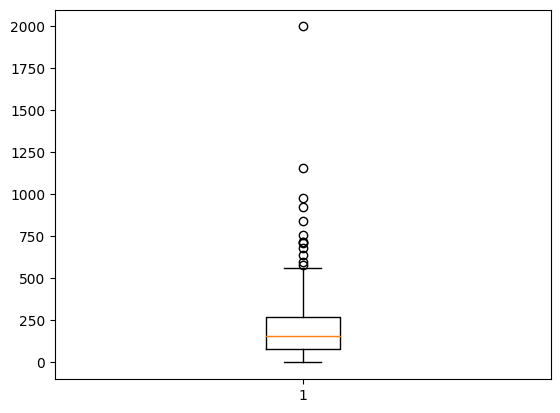

In [ ]:
plt.boxplot(df["X13"])

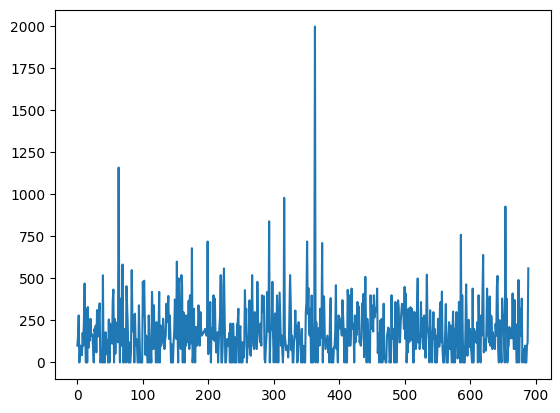

In [ ]:
plt.plot(df["X13"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f506173a530>,
 'caps': [<matplotlib.lines.Line2D at 0x7f506173aa70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f506173a290>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5061898d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f506173a8c0>],
 'means': []}

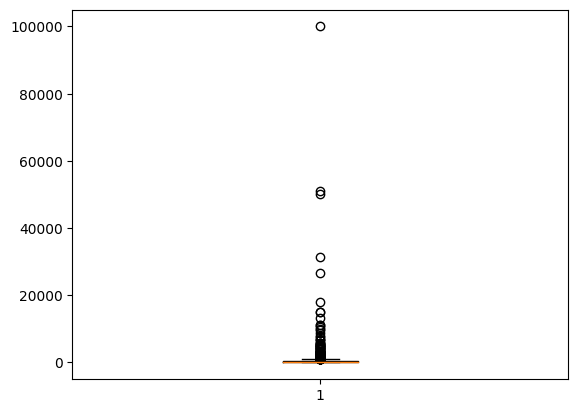

In [ ]:
plt.boxplot(df["X14"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f506179b640>,
 'caps': [<matplotlib.lines.Line2D at 0x7f506179bb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f506179b3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f50617cc100>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f50617cc3a0>],
 'means': []}

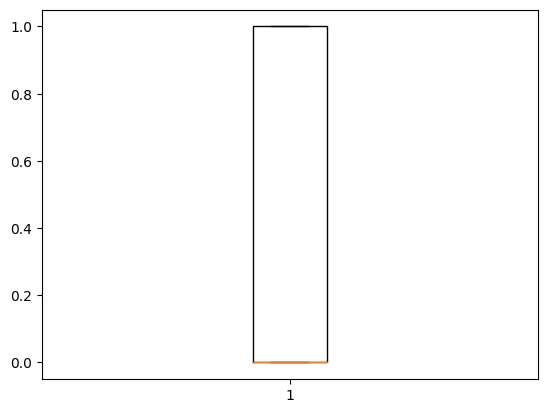

In [ ]:
plt.boxplot(df["Y"])

Los valores atípicos, también conocidos como outliers, son aquellos que se encuentran muy alejados de la mayoría de los valores en un conjunto de datos. Estos valores extremos pueden afectar negativamente el análisis o el modelo que se construya, introduciendo sesgos o distorsiones en los resultados.

In [ ]:
from scipy import stats
#Eliminación de outliers en el dataframe
df=df[(np.abs(stats.zscore(df["X14"])) < 0.3)]
df=df[(np.abs(stats.zscore(df["X13"])) < 3)]

El método de puntuaciones z es una técnica estadística que nos permite identificar y cuantificar la desviación de un valor con respecto a la media del conjunto de datos, en términos de la desviación estándar. Calculando el z-score para cada valor, podemos determinar qué tan lejos se encuentra dicho valor de la media en términos de desviaciones estándar. Valores con z-scores altos, ya sean positivos o negativos, se consideran atípicos.

Para la columna "X14", se eliminan los valores cuyo z-score absoluto es mayor que 0.3, lo cual indica que están más alejados de la media.

Para la columna "X13", se aplica un filtro similar, pero en este caso, se eliminan los valores cuyo z-score absoluto es mayor que 3.

Esto permite filtrar y eliminar los outliers en las columnas "X14" y "X13" del df, con el objetivo de obtener un conjunto de datos más limpio y libre de valores extremos que puedan afectar el análisis o el modelo

<Axes: >

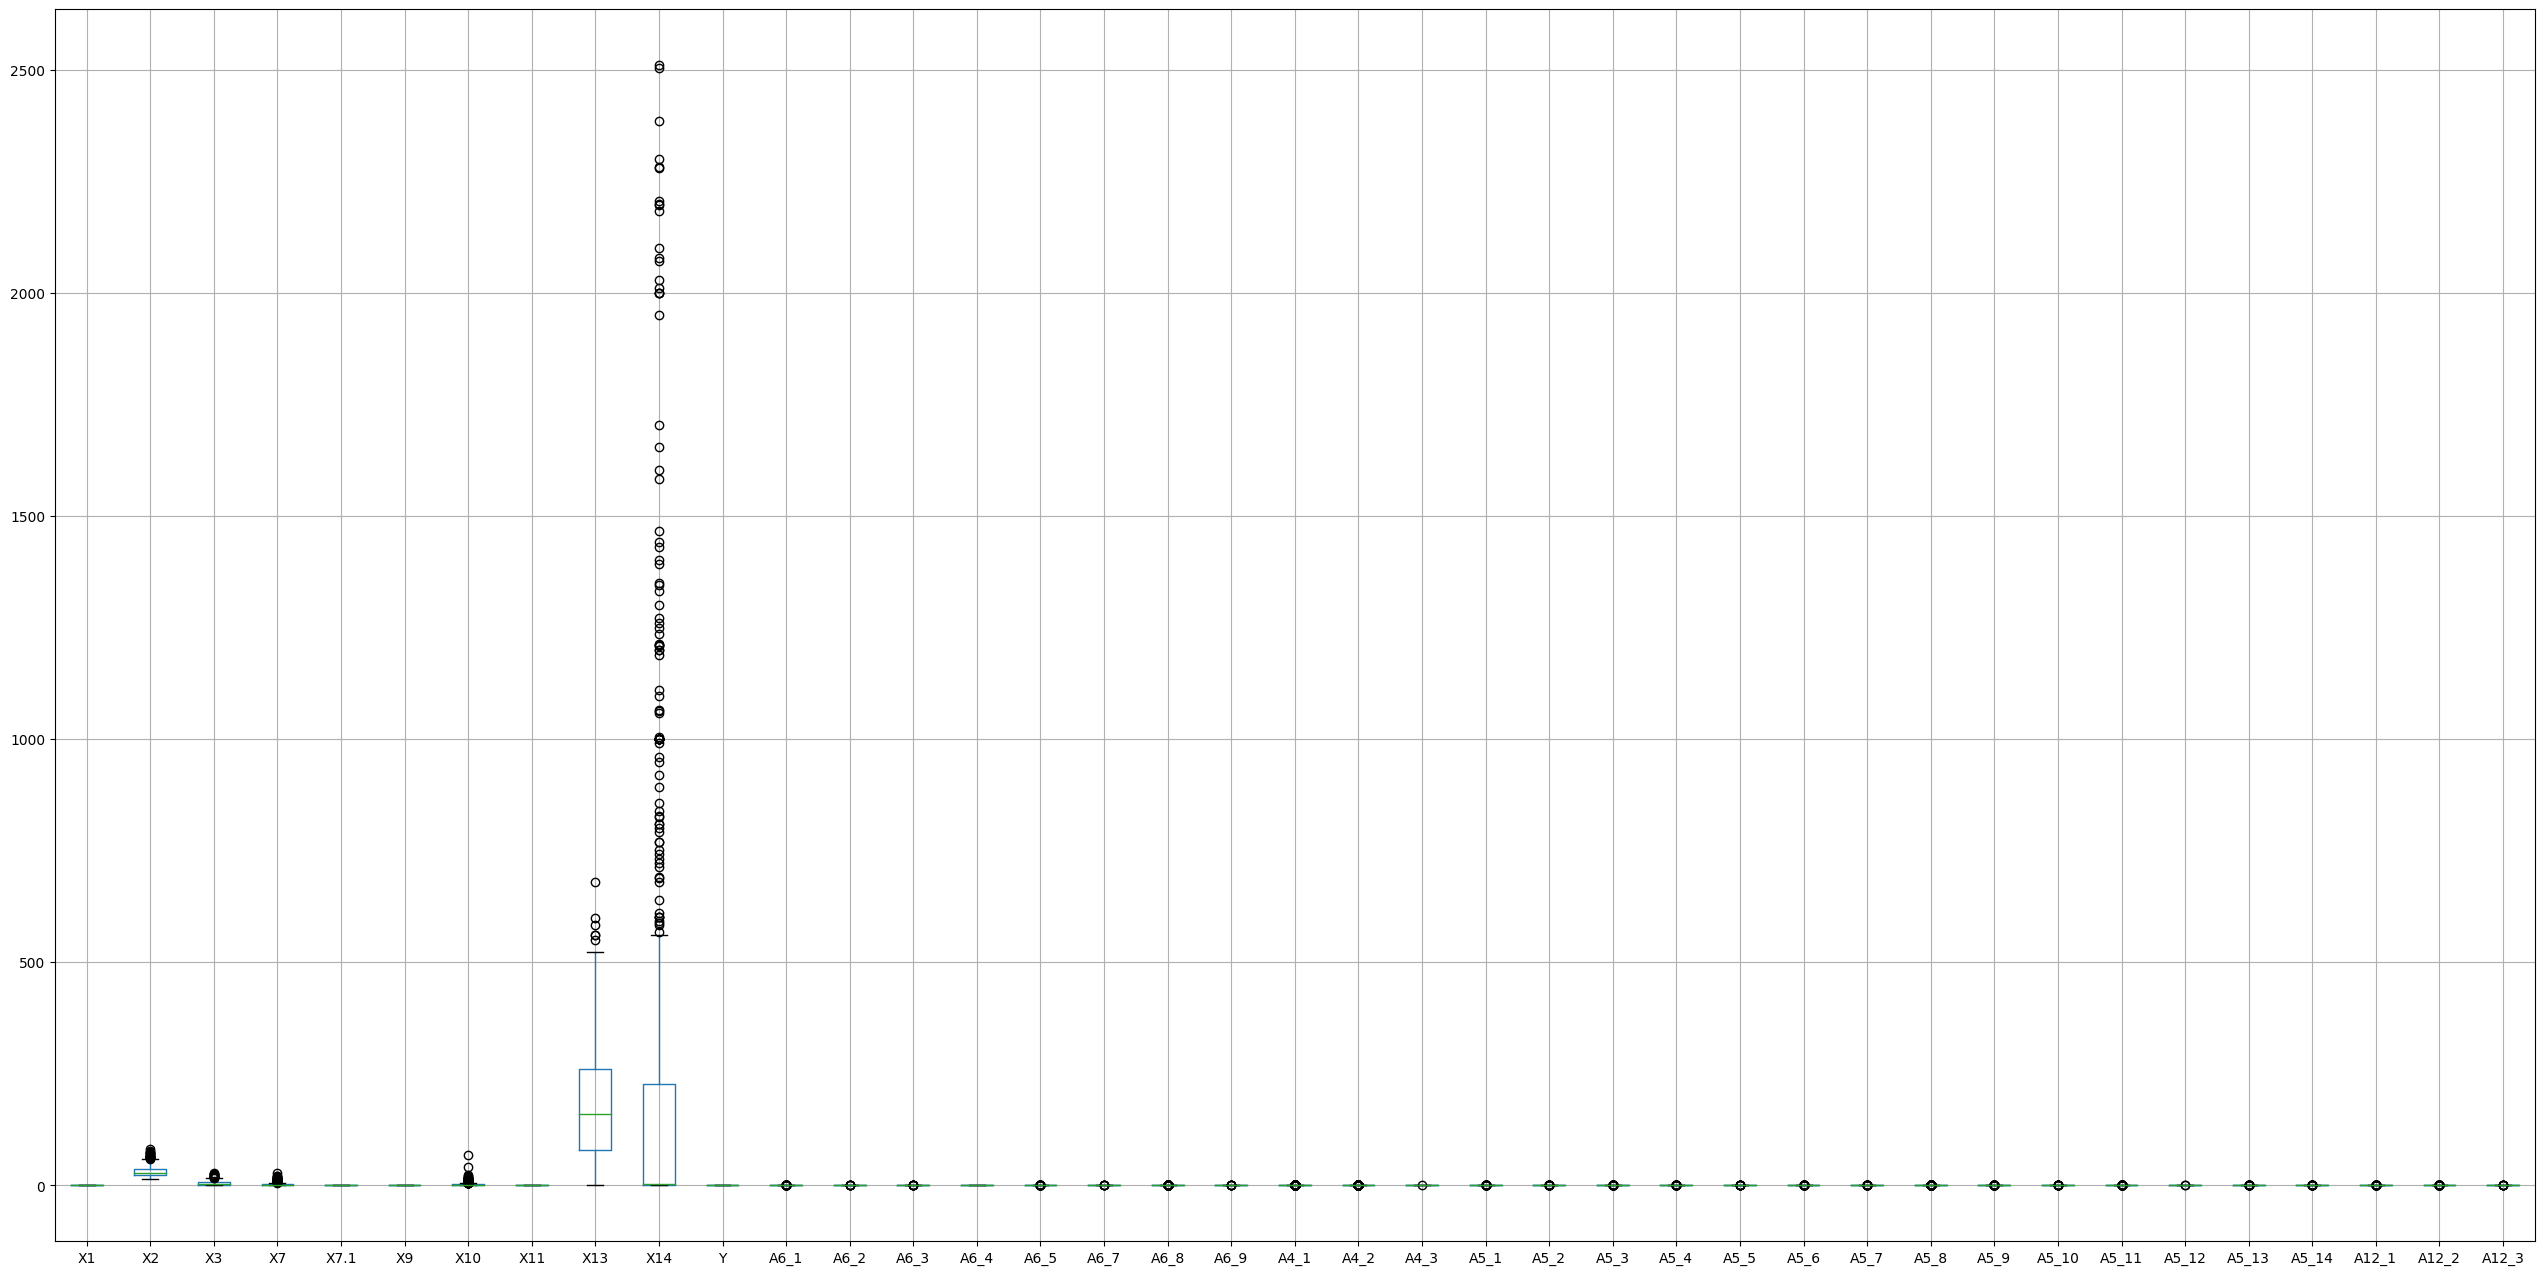

In [ ]:
df.boxplot(figsize=(32,16))

array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>,
        <Axes: title={'center': 'X3'}>, <Axes: title={'center': 'X7'}>,
        <Axes: title={'center': 'X7.1'}>, <Axes: title={'center': 'X9'}>],
       [<Axes: title={'center': 'X10'}>, <Axes: title={'center': 'X11'}>,
        <Axes: title={'center': 'X13'}>, <Axes: title={'center': 'X14'}>,
        <Axes: title={'center': 'Y'}>, <Axes: title={'center': 'A6_1'}>],
       [<Axes: title={'center': 'A6_2'}>,
        <Axes: title={'center': 'A6_3'}>,
        <Axes: title={'center': 'A6_4'}>,
        <Axes: title={'center': 'A6_5'}>,
        <Axes: title={'center': 'A6_7'}>,
        <Axes: title={'center': 'A6_8'}>],
       [<Axes: title={'center': 'A6_9'}>,
        <Axes: title={'center': 'A4_1'}>,
        <Axes: title={'center': 'A4_2'}>,
        <Axes: title={'center': 'A4_3'}>,
        <Axes: title={'center': 'A5_1'}>,
        <Axes: title={'center': 'A5_2'}>],
       [<Axes: title={'center': 'A5_3'}>,
        <Ax

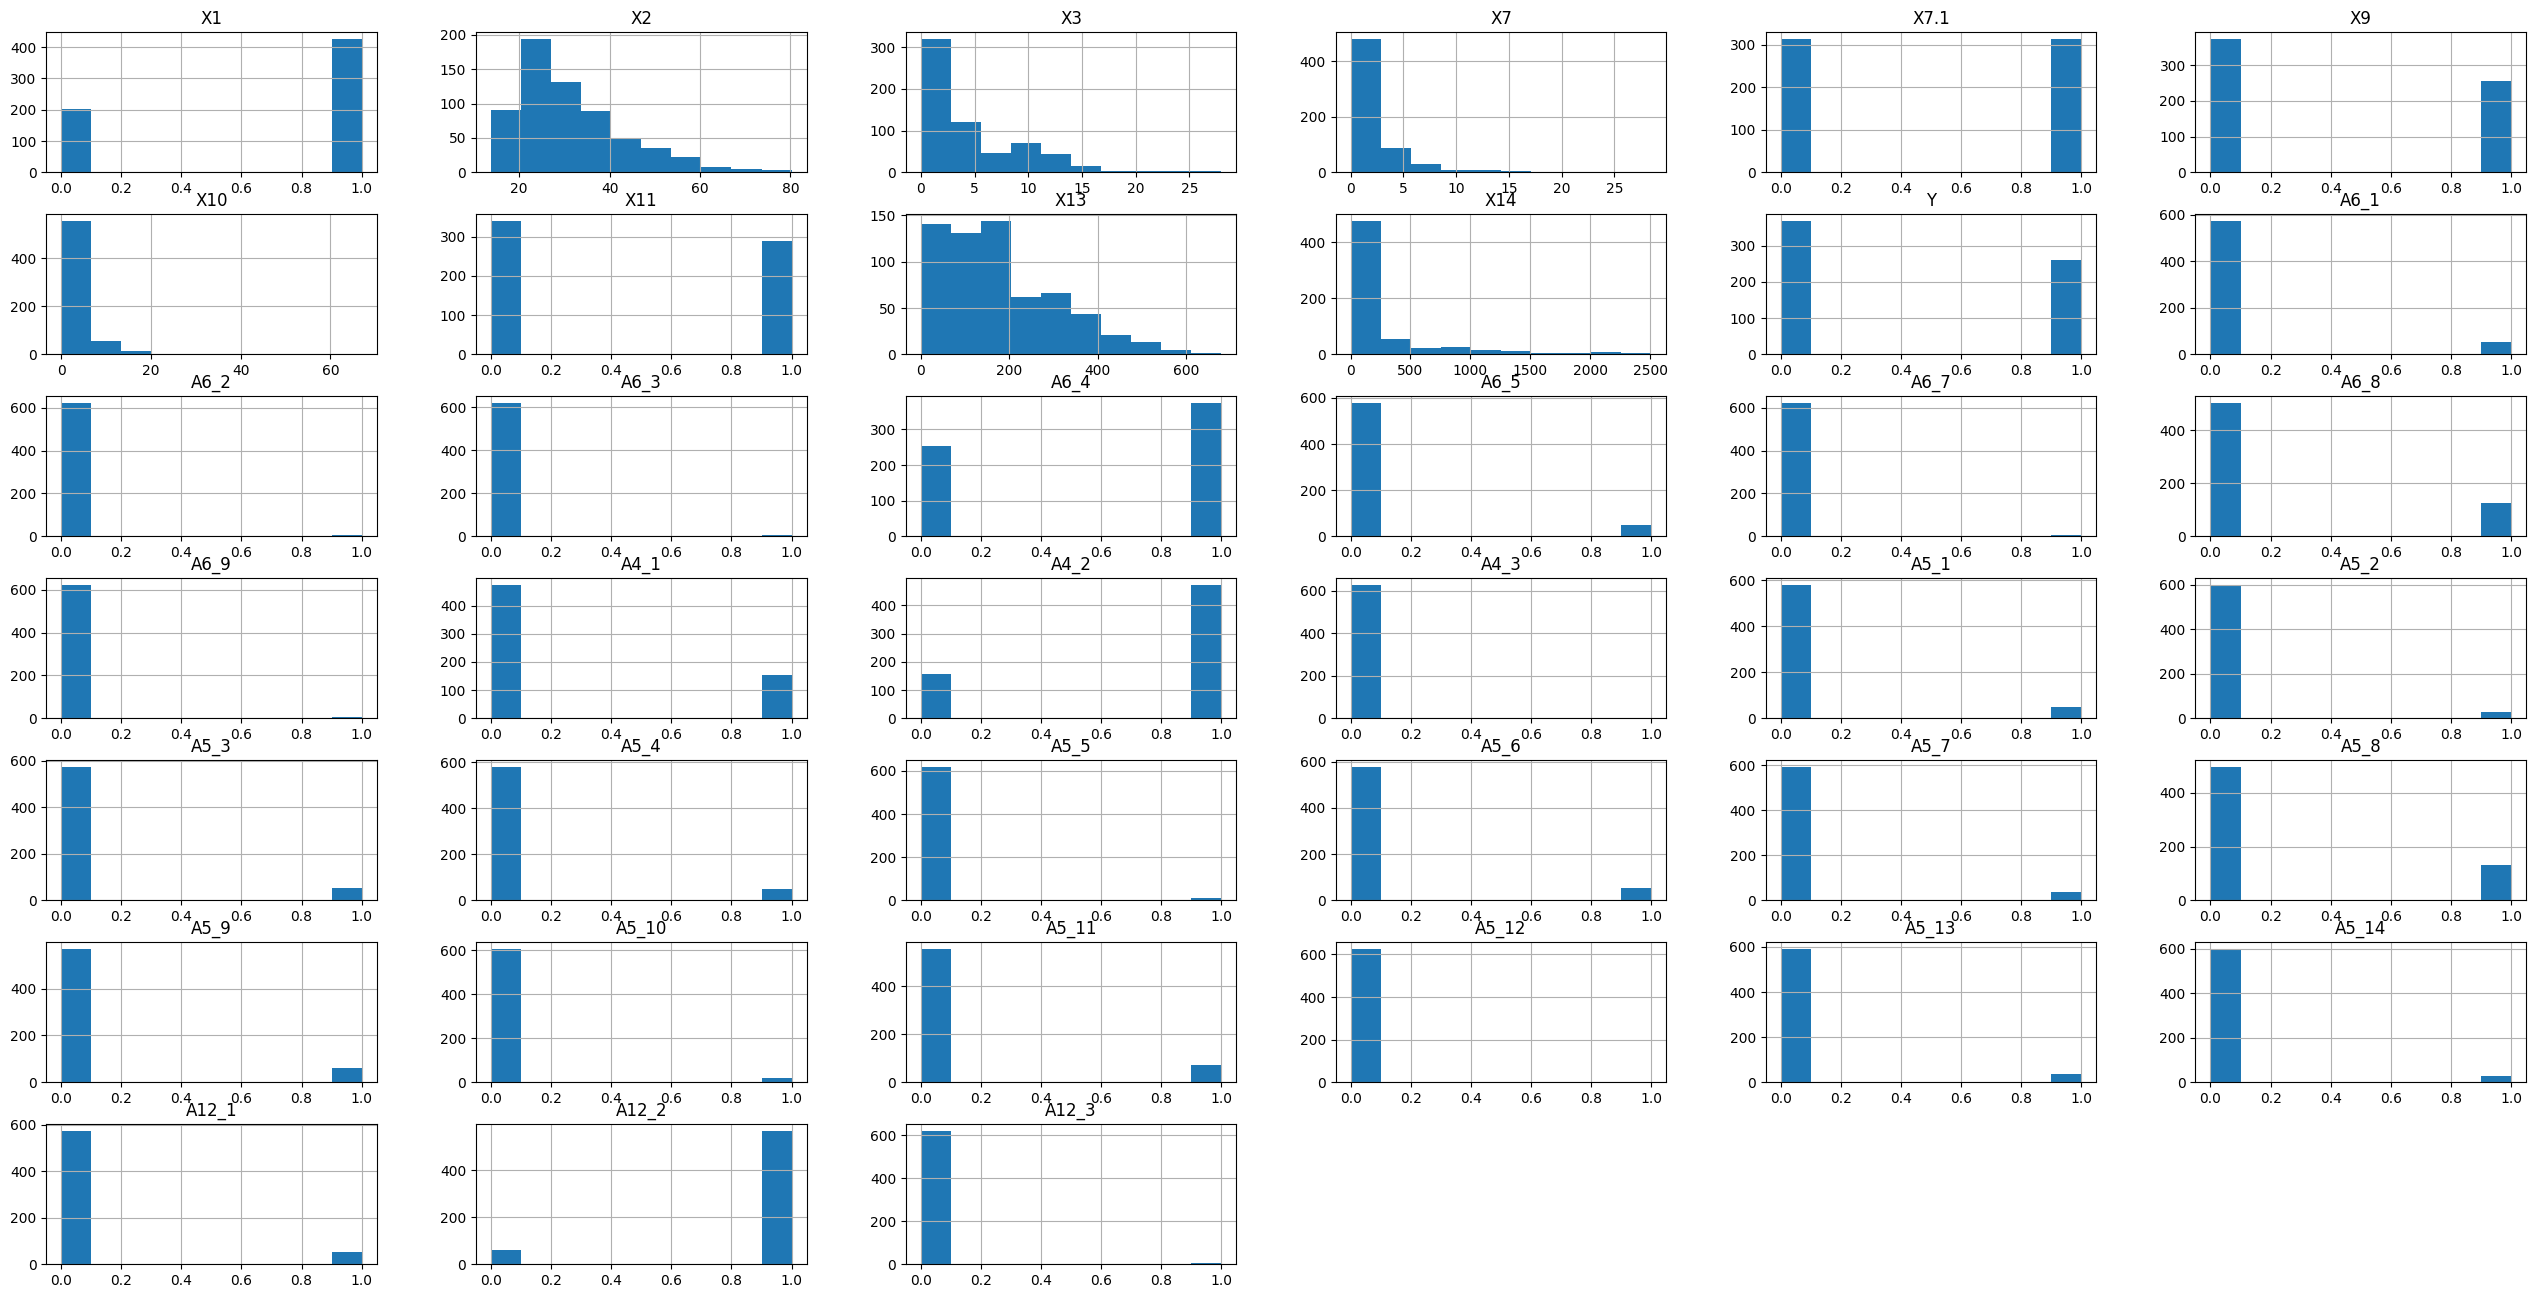

In [ ]:
df.hist(figsize=(32,16))

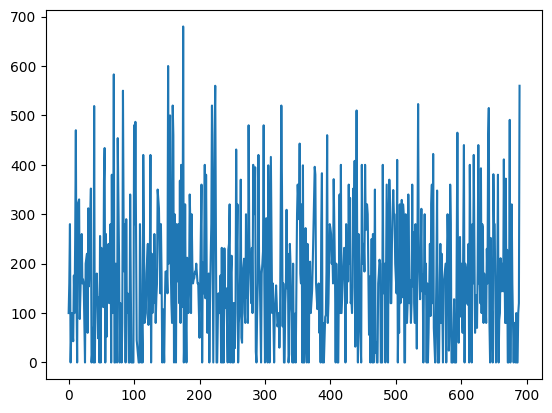

In [ ]:
plt.plot(df["X13"])

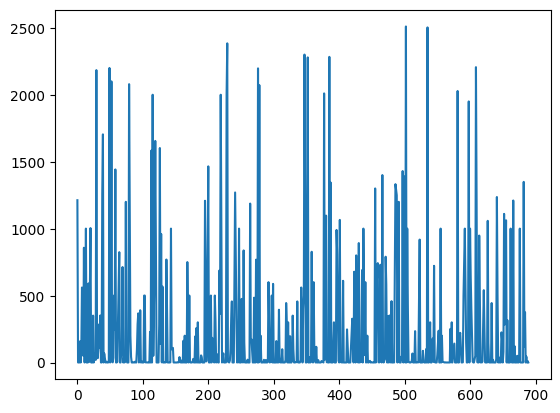

In [ ]:
plt.plot(df["X14"])

In [ ]:
df

,X1,X2,X3,X7,X7.1,X9,X10,X11,X13,X14,...,A5_8,A5_9,A5_10,A5_11,A5_12,A5_13,A5_14,A12_1,A12_2,A12_3
0,1,22.08,11.460,1.585,0,0,0,1,100,1213,...,0,0,0,0,0,0,0,0,1,0
1,0,22.67,7.000,0.165,0,0,0,0,160,1,...,1,0,0,0,0,0,0,0,1,0
2,0,29.58,1.750,1.250,0,0,0,1,280,1,...,0,0,0,0,0,0,0,0,1,0
3,0,21.67,11.500,0.000,1,1,11,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,20.17,8.170,1.960,1,1,14,0,60,159,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,6.500,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
686,1,20.67,0.415,0.125,0,0,0,0,0,45,...,1,0,0,0,0,0,0,0,1,0
687,0,18.83,9.540,0.085,1,0,0,0,100,1,...,0,0,0,0,0,0,0,0,1,0
688,0,27.42,14.500,3.085,1,1,1,0,120,12,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
df.describe()

,X1,X2,X3,X7,X7.1,X9,X10,X11,X13,X14,...,A5_8,A5_9,A5_10,A5_11,A5_12,A5_13,A5_14,A12_1,A12_2,A12_3
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,...,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,0.678344,31.264682,4.588591,2.154244,0.500000,0.406051,2.194268,0.458599,174.062102,238.679936,...,0.210191,0.093949,0.033439,0.114650,0.003185,0.058917,0.046178,0.085987,0.902866,0.011146
std,0.467484,11.822790,4.766232,3.304795,0.500399,0.491486,4.782060,0.498680,135.933072,482.758000,...,0.407769,0.291990,0.179925,0.318853,0.056388,0.235657,0.210038,0.280569,0.296376,0.105071
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.560000,1.000000,0.165000,0.000000,0.000000,0.000000,0.000000,80.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,28.290000,2.750000,1.000000,0.500000,0.000000,0.000000,0.000000,160.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,37.372500,7.000000,2.500000,1.000000,1.000000,2.000000,1.000000,260.000000,226.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,80.250000,28.000000,28.500000,1.000000,1.000000,67.000000,1.000000,680.000000,2511.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y=df["Y"]
X=df.drop(['Y'], axis=1)

#**Ejercicio 1.**

Realiza una **partición de los datos con 15%** en el conjunto de prueba y el resto para entrenamiento y validación. Usa un **random_state=0**.

In [ ]:
# Partición de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

# Verificación de los tamaños de los conjuntos
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))

df

Tamaño del conjunto de entrenamiento: 533
Tamaño del conjunto de prueba: 95


,X1,X2,X3,X7,X7.1,X9,X10,X11,X13,X14,...,A5_8,A5_9,A5_10,A5_11,A5_12,A5_13,A5_14,A12_1,A12_2,A12_3
0,1,22.08,11.460,1.585,0,0,0,1,100,1213,...,0,0,0,0,0,0,0,0,1,0
1,0,22.67,7.000,0.165,0,0,0,0,160,1,...,1,0,0,0,0,0,0,0,1,0
2,0,29.58,1.750,1.250,0,0,0,1,280,1,...,0,0,0,0,0,0,0,0,1,0
3,0,21.67,11.500,0.000,1,1,11,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,20.17,8.170,1.960,1,1,14,0,60,159,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,6.500,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
686,1,20.67,0.415,0.125,0,0,0,0,0,45,...,1,0,0,0,0,0,0,0,1,0
687,0,18.83,9.540,0.085,1,0,0,0,100,1,...,0,0,0,0,0,0,0,0,1,0
688,0,27.42,14.500,3.085,1,1,1,0,120,12,...,0,0,0,0,0,0,1,0,1,0


#**Ejercicio2.**

Hacer una análisis de los datos y llevar a cabo las transformaciones que consideres adecuadas.
Utiliza un Pipeline para evitar el filtrado de información

array([[<Axes: title={'center': 'X2'}>, <Axes: title={'center': 'X3'}>,
        <Axes: title={'center': 'X7'}>, <Axes: title={'center': 'X13'}>,
        <Axes: title={'center': 'X14'}>, <Axes: title={'center': 'X9'}>],
       [<Axes: title={'center': 'X10'}>, <Axes: title={'center': 'X11'}>,
        <Axes: title={'center': 'X13'}>, <Axes: title={'center': 'X14'}>,
        <Axes: title={'center': 'A6_1'}>,
        <Axes: title={'center': 'A6_2'}>],
       [<Axes: title={'center': 'A6_3'}>,
        <Axes: title={'center': 'A6_4'}>,
        <Axes: title={'center': 'A6_5'}>,
        <Axes: title={'center': 'A6_7'}>,
        <Axes: title={'center': 'A6_8'}>,
        <Axes: title={'center': 'A6_9'}>],
       [<Axes: title={'center': 'A4_1'}>,
        <Axes: title={'center': 'A4_2'}>,
        <Axes: title={'center': 'A4_3'}>,
        <Axes: title={'center': 'A5_1'}>,
        <Axes: title={'center': 'A5_2'}>,
        <Axes: title={'center': 'A5_3'}>],
       [<Axes: title={'center': 'A5_4'}>,


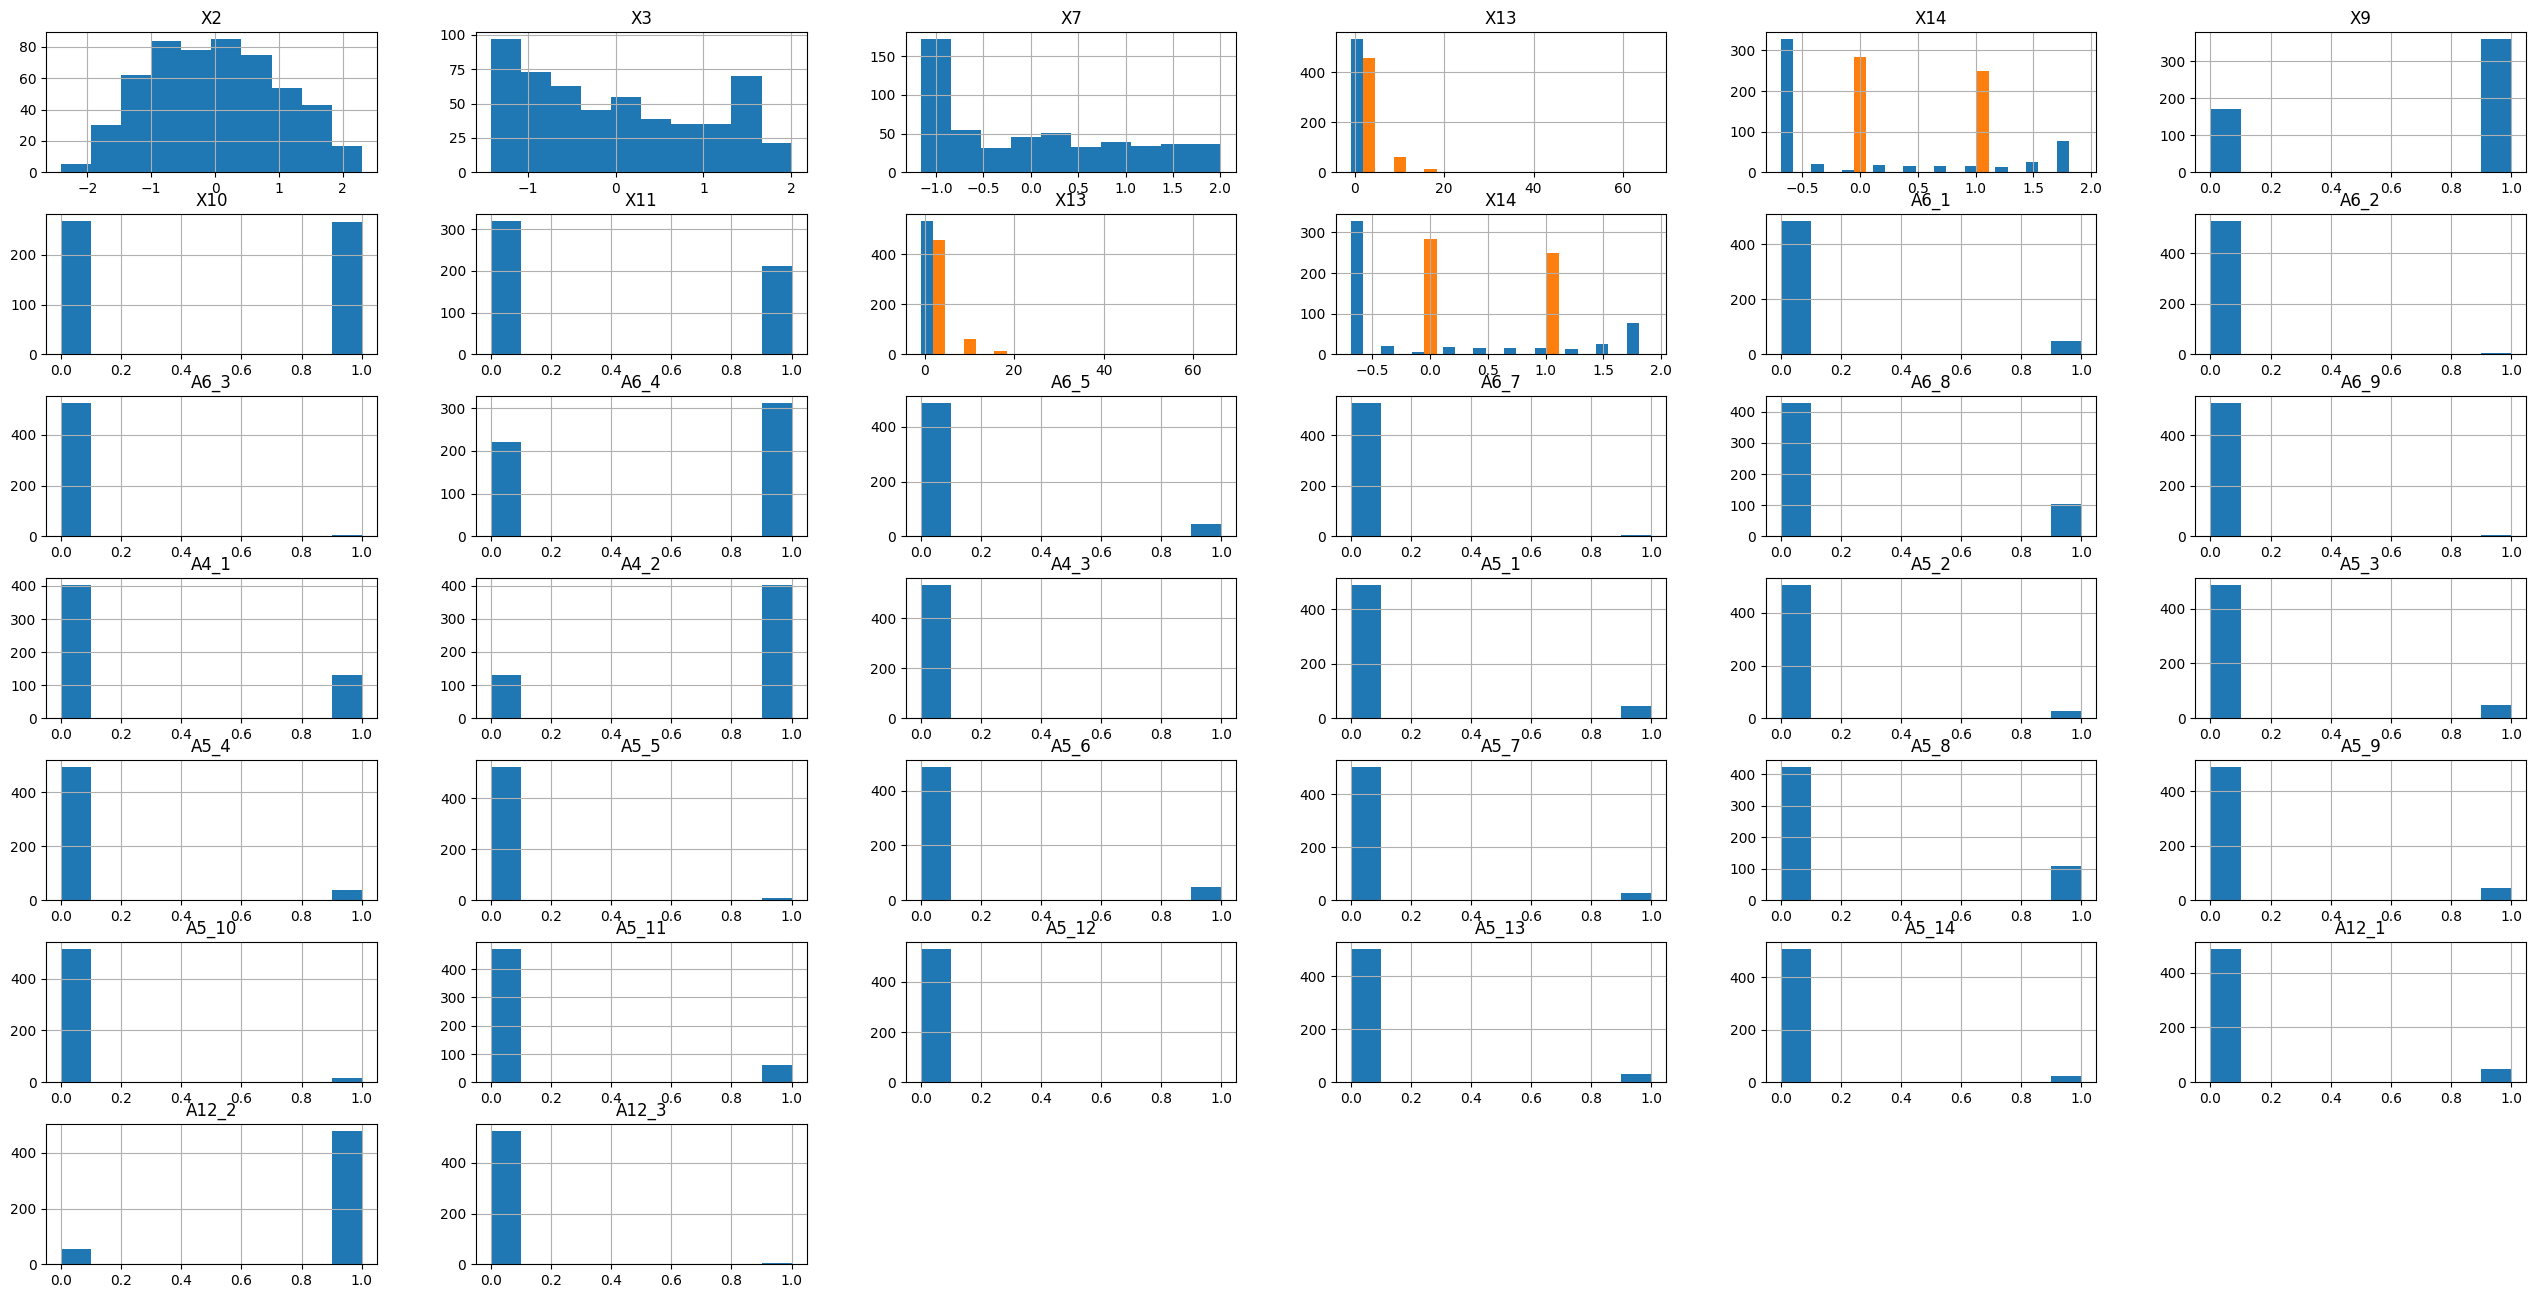

In [ ]:
cont_cols = ['X2', 'X3', 'X7', 'X13', 'X14']

# Definir el Pipeline
num_pipeline = Pipeline([
    ('scaling', MinMaxScaler(feature_range=(1, 2))),  # Escalamiento de valores
    ('imputing', SimpleImputer(strategy='most_frequent')),  # Imputación de valores faltantes con la moda
    ('power_transform', PowerTransformer(method='box-cox'))  # Transformación de variables con Box-Cox
])

# ColumnTransformer para aplicar el Pipeline a las columnas numéricas
column_transformer = ColumnTransformer(
    transformers=[
        ('numeric_pipeline', num_pipeline, cont_cols)  # Aplicar el Pipeline a las columnas numéricas
    ],
    remainder='passthrough'  # Mantener las columnas no transformadas
)

# Aplicar las transformaciones al conjunto de entrenamiento
transformed_data = pd.DataFrame(column_transformer.fit_transform(X_train), columns=cont_cols + list(X_train.columns[len(cont_cols):]))

# Mostrar el histograma de las variables transformadas
transformed_data.hist(figsize=(32, 16))

Aqui podemos analizar la forma de las distribuciones, la presencia de sesgo o simetría, así como la dispersión de los datos.

#**Ejercicio 3**

Utiliza la función Dummy para modelos de clasificación con la estrategia “stratified” con el conjunto
que tienes de datos de entrenamiento y validación. Obtener los valores de partida (baseline) de las
siguientes métricas: accuracy, f1-score, precision y recall. ¿Por qué consideras que es adecuado usar
la estrategia “stratified” en este caso?

Respecto a la estrategia "stratified", es adecuado utilizarla en este caso porque garantiza que la distribución de las clases en el conjunto de datos de entrenamiento y validación sea similar a la distribución original. Esto es especialmente útil cuando se trabaja con conjuntos de datos desbalanceados, ya que ayuda a evitar sesgos en la evaluación del modelo.

In [ ]:
# Dividir los conjuntos de datos en entrenamiento y validación
X_train_dummy, X_val_dummy, y_train_dummy, y_val_dummy = train_test_split(X_train, y_train, train_size=300, random_state=42)

# Crear y ajustar el modelo Dummy con estrategia "stratified"
modeloDummy = DummyClassifier(strategy='stratified', random_state=0)
modeloDummy.fit(X_train_dummy, y_train_dummy)

# Predecir etiquetas para el conjunto de validación y entrenamiento
y_pred_val = modeloDummy.predict(X_val_dummy)
y_pred_train = modeloDummy.predict(X_train_dummy)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_val_dummy, y_pred_val)
f1 = f1_score(y_val_dummy, y_pred_val)
precision = precision_score(y_val_dummy, y_pred_val)
recall = recall_score(y_val_dummy, y_pred_val)

# Imprimir los resultados
print('Baseline - Métricas:')
print('Accuracy: %.4f' % accuracy)
print('F1-score: %.4f' % f1)
print('Precision: %.4f' % precision)
print('Recall: %.4f' % recall)

Baseline - Métricas:
Accuracy: 0.4936
F1-score: 0.3980
Precision: 0.3824
Recall: 0.4149


**Accuracy:** La precisión general del modelo, es decir, la proporción de predicciones correctas sobre el total de predicciones. En este caso, el modelo Dummy logra una precisión de 0.4936, lo que indica que acierta aproximadamente el 49.36% de las veces.

**F1-score:** Es una medida que combina la precisión y el recall (también conocido como sensibilidad) en una única métrica. Representa la media armónica entre ambos valores y se utiliza cuando hay un desequilibrio entre las clases. En este caso, el F1-score obtenido es de 0.3980.

**Precision:** Indica la proporción de verdaderos positivos (instancias correctamente clasificadas como positivas) sobre el total de predicciones positivas. En este caso, el modelo Dummy tiene una precisión de 0.3824, lo que significa que aproximadamente el 38.24% de las predicciones positivas son correctas.

**Recall:** Representa la proporción de verdaderos positivos sobre el total de instancias positivas reales. En este caso, el recall obtenido es de 0.4149, lo que indica que el modelo Dummy logra capturar aproximadamente el 41.49% de las instancias positivas.

En general, estos resultados representan el rendimiento inicial del modelo Dummy, que se utiliza como referencia (baseline). El objetivo es superar estos valores al desarrollar y ajustar modelos más sofisticados y efectivos.

#**Ejercicio 4**

Usando el modelo de máquina de vector soporte (SVM) encuentra sus mejores hiperparámetros
con una búsqueda de malla y validación cruzada, desplegando los errores indicados en el ejercicio
anterior.

In [ ]:
# Definir el modelo SVM y las transformaciones de columnas
modelo_SVM = svm.SVC(kernel='rbf', C=10, gamma=35)

# Crear el pipeline
pipeline_SVM = Pipeline(steps=[('ct', columnasTransformer), ('m', modelo_SVM)])


cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

# Definir los parámetros para la búsqueda en malla
dicc_grid_SVM = {
    'm__kernel':["linear","poly","rbf","sigmoid"],
    'm__C': [1.0, 0.01,0.001,10.0],
    'm__gamma': ['scale',"auto"]
}

grid_SVM = GridSearchCV(estimator=pipeline_SVM,
                        param_grid=dicc_grid_SVM,
                        cv=cv,
                        scoring=make_scorer(sklearn.metrics.f1_score),
                        n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento
start_time = time.time()
grid_SVM.fit(X_train, y_train)
end_time = time.time()

# Obtener los resultados
best_score = grid_SVM.best_score_
best_params = grid_SVM.best_params_
print(f"Execution time: {end_time - start_time} seconds")
print(f"Best score: {best_score}")
print(f"Best params: {best_params}")

Execution time: 17.760489225387573 seconds
Best score: 0.8259750964088062
Best params: {'m__C': 1.0, 'm__gamma': 'scale', 'm__kernel': 'rbf'}


Execution time: 17.760489225387573 seconds

Este valor indica el tiempo de ejecución en segundos que tomó el proceso de ajuste del modelo SVM con la búsqueda de hiperparámetros y validación cruzada.
Best score: 0.8259750964088062

Esta métrica representa el mejor puntaje obtenido durante la búsqueda de hiperparámetros. En este caso, se utilizó la métrica de F1-score para evaluar el desempeño del modelo.

El valor de 0.8259750964088062 indica que el modelo SVM con los mejores hiperparámetros logró un buen equilibrio entre precisión y exhaustividad en la clasificación.
Best params: {'m__C': 1.0, 'm__gamma': 'scale', 'm__kernel': 'rbf'}

Estos son los mejores hiperparámetros encontrados durante la búsqueda. En este caso, **los mejores hiperparámetros para el modelo SVM fueron:**
'm__C': 1.0:

El parámetro de regularización C es 1.0, lo que indica una regularización moderada.

'm__gamma': 'scale': El valor de gamma se estableció en 'scale', lo que significa que se utiliza el inverso de la desviación estándar de los datos de entrada para el cálculo de gamma.

'm__kernel': 'rbf': Se utiliza el kernel RBF (Función de Base Radial) para el modelo SVM.

Estos resultados indican que el modelo SVM con los hiperparámetros mencionados fue el que obtuvo el mejor rendimiento en términos de F1-score durante la búsqueda y validación cruzada. Sin embargo, para una interpretación completa del desempeño del modelo, es importante tener en cuenta otras métricas como la precisión, la exhaustividad y la exactitud en el conjunto de pruebas.

In [ ]:
# Evaluar el modelo en el conjunto de pruebas
y_pred = grid_SVM.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Valor de accuracy del modelo: %.4f' % accuracy)
print("Valor del f1 del modelo: %.4f" % f1)
print('Valor de precision del modelo: %.4f' % precision)
print("Valor del recall del modelo: %.4f" % recall)

Valor de accuracy del modelo: 0.8842
Valor del f1 del modelo: 0.8675
Valor de precision del modelo: 0.8372
Valor del recall del modelo: 0.9000


El resultado obtenido al evaluar el modelo SVM en el conjunto de pruebas utilizando los mejores hiperparámetros encontrados es el siguiente:

**Valor de accuracy del modelo: **0.8842

La precisión del modelo, medida por el accuracy (exactitud), es del 88.42%. Esto significa que el modelo clasifica correctamente el 88.42% de las instancias del conjunto de pruebas.

Valor del f1 del modelo: 0.8675

El valor del F1-score del modelo es del 86.75%. El F1-score es una medida que combina la precisión y la exhaustividad (recall) en un solo valor, y se utiliza para evaluar el desempeño general del modelo. Un F1-score alto indica un buen equilibrio entre precisión y exhaustividad.
Valor de precision del modelo: 0.8372

La precisión del modelo, que representa la proporción de instancias clasificadas como positivas que realmente son positivas, es del 83.72%.
Valor del recall del modelo: 0.9000

El valor del recall, también conocido como exhaustividad o sensibilidad, es del 90.00%. El recall indica la proporción de instancias positivas que fueron correctamente identificadas por el modelo.

En resumen, estos resultados indican que el modelo SVM con los mejores hiperparámetros logra una precisión y recall satisfactorios en la clasificación del conjunto de pruebas, con un buen equilibrio representado por el F1-score.

#**Ejercicio 5**

Obtener además los diagramas de caja y bigote del mejor modelo con todas las métricas calculadas.
Incluye tus conclusiones.

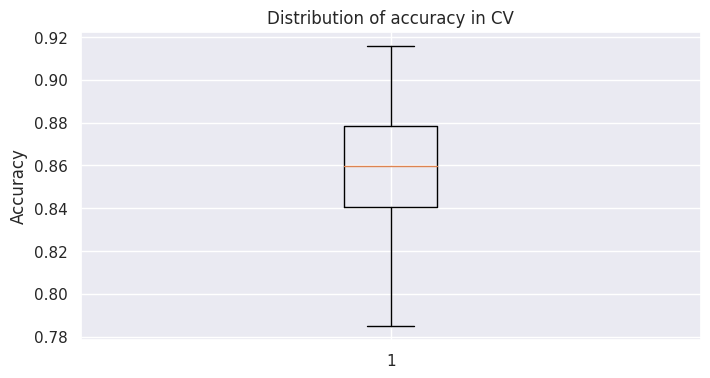

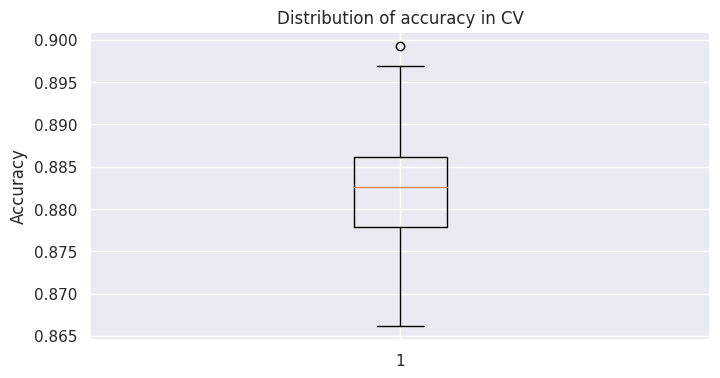

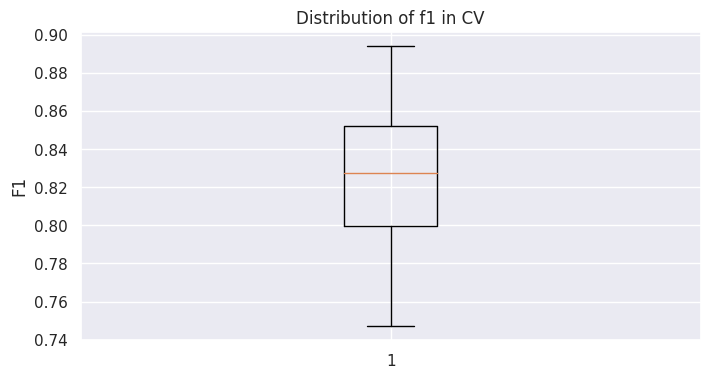

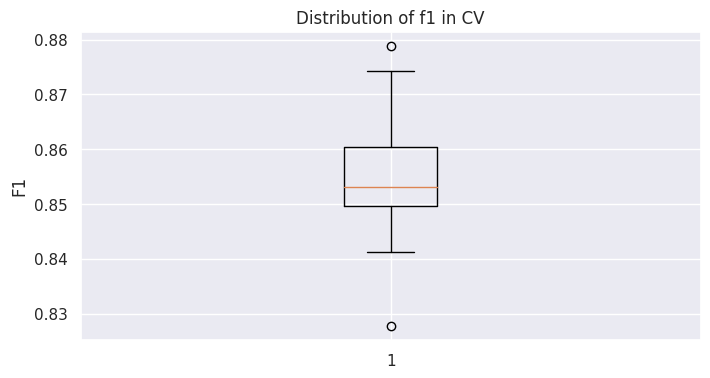

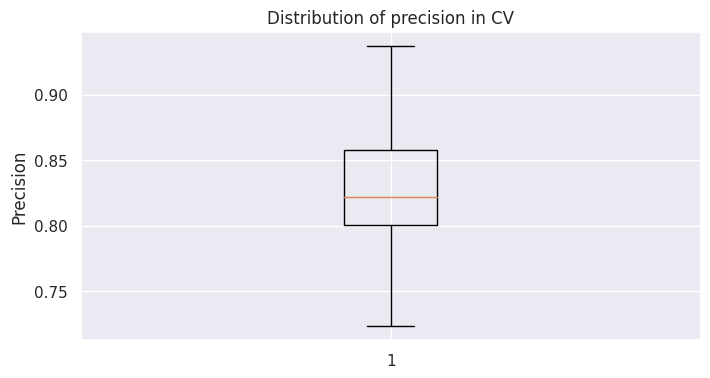

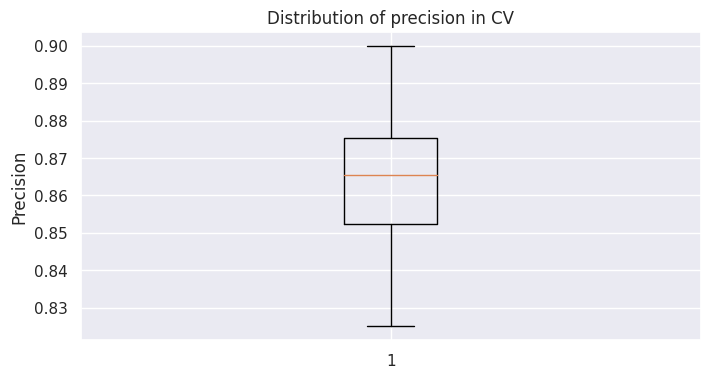

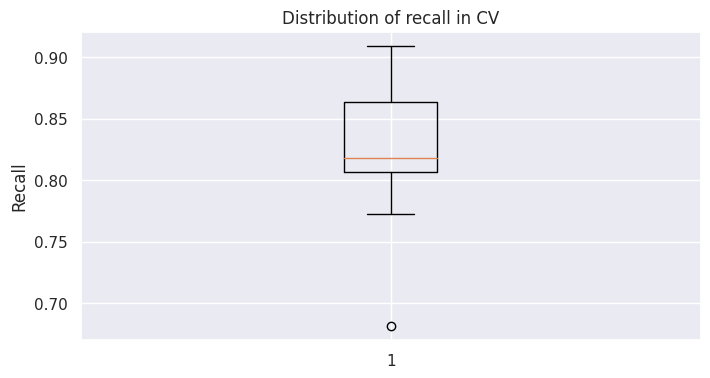

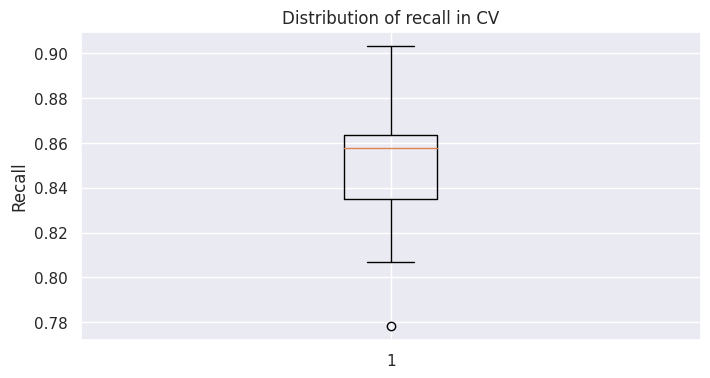

In [ ]:
# Definir el modelo SVM y las transformaciones de columnas
modelo_SVM = svm.SVC(kernel='rbf', C=1.0, gamma="scale")
pipeline_SVM = Pipeline(steps=[('ct', columnasTransformer), ('m', modelo_SVM)])

mismetricas = {
    'accuracy': make_scorer(sklearn.metrics.accuracy_score),
    'f1': make_scorer(sklearn.metrics.f1_score),
    'precision': make_scorer(sklearn.metrics.precision_score),
    'recall': make_scorer(sklearn.metrics.recall_score)
}

pipeline = pipeline_SVM
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
scores = cross_validate(pipeline, X_train, np.ravel(y_train), scoring=mismetricas, cv=cv, return_train_score=True, n_jobs=-1, return_estimator=True)

metrics = ['accuracy', 'f1', 'precision', 'recall']

#buble para generar los diagramas de caja y bigote para cada una de las metricas
for metric in metrics:
    sns.set(rc={'figure.figsize':(8, 4)})
    plt.boxplot(scores[f"test_{metric}"])
    plt.ylabel(metric.capitalize())
    plt.title(f'Distribution of {metric} in CV')
    plt.show()

    sns.set(rc={'figure.figsize':(8, 4)})
    plt.boxplot(scores[f"train_{metric}"])
    plt.ylabel(metric.capitalize())
    plt.title(f'Distribution of {metric} in CV')
    plt.show()

**Conclusiones**

El tiempo de ejecución del ajuste del modelo fue de aproximadamente 17.76 segundos. Esto proporciona una referencia útil para evaluar el tiempo necesario para entrenar modelos similares en el futuro.

El mejor score obtenido por el modelo en términos de F1 fue de 0.8259. Esto indica que el modelo logra un equilibrio entre la precisión y el recall en la clasificación de las muestras.

El mejor conjunto de parámetros encontrado para el modelo SVM fue {'m__C': 1.0, 'm__gamma': 'scale', 'm__kernel': 'rbf'}. Estos valores específicos de los hiperparámetros proporcionan la configuración óptima para el modelo en este caso.

Al evaluar el modelo en el conjunto de pruebas, se obtuvo un accuracy de 0.8842, un f1-score de 0.8675, una precision de 0.8372 y un recall de 0.9. Estas métricas indican que el modelo tiene un buen rendimiento en la clasificación de nuevas muestras no vistas.

Los diagramas de caja y bigote muestran que el desempeño del modelo es consistente tanto en el conjunto de entrenamiento como en el de validación. Las variaciones en las métricas son pequeñas, lo que sugiere que el modelo no está sobreentrenado ni subentrenado. Además, los valores de las métricas se encuentran en un rango aceptable, lo que indica un buen ajuste general del modelo.

#**Ejercicio 6**

Verifica que el modelo no esté subentrenado o sobreentrenado mediante alguna de las gráficas de
curvas de entrenamiento (aumentando la complejidad o aumentando el conjunto de entrenamiento,
la que consideres más adecuada). De ser necesario, realiza los ajustes necesarios para evitar alguno
de estos problemas.

Train Mean Scores: [0.         0.64248435 0.85176324 0.91993098 0.97660464]
Train Standard Deviations: [0.         0.01856401 0.00517711 0.01081846 0.01166401]
Test Mean Scores: [0.         0.6308547  0.80347734 0.81750858 0.78438238]
Test Standard Deviations: [0.         0.0783102  0.04388698 0.01471874 0.03879436]


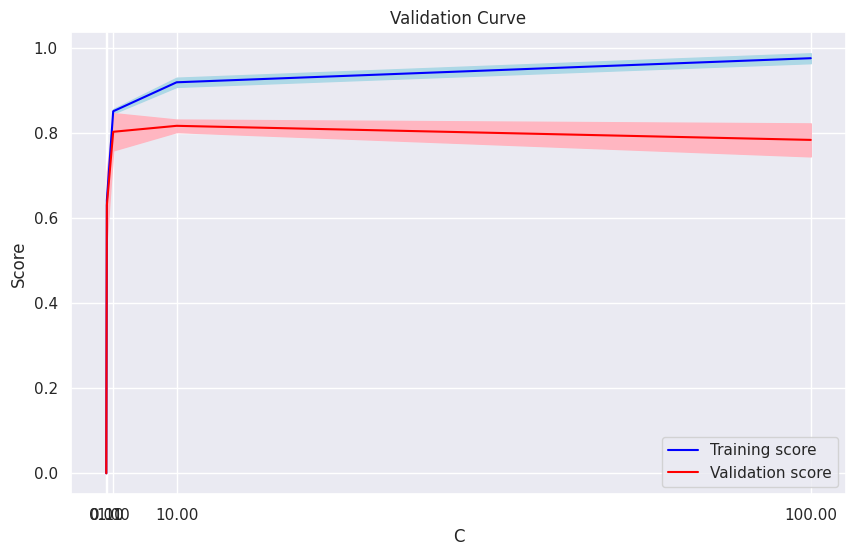

In [ ]:
# Definir el modelo SVM y las transformaciones de columnas
modelo_SVM = svm.SVC(kernel='rbf', gamma="scale", probability=True)
pipeline_SVM = Pipeline(steps=[('ct', columnasTransformer), ('m', modelo_SVM)])

# Definir los valores de C a probar
param_range = [0.01, 0.1, 1, 10, 100]

# Calcular las curvas de validación
train_scores, test_scores = validation_curve(pipeline_SVM, X_train, y_train, param_name='m__C', param_range=param_range, cv=5, scoring='f1')

# Calcular las medias y desviaciones estándar de los scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar las curvas de validación
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training score', color='blue')
plt.plot(param_range, test_mean, label='Validation score', color='red')

# Rellenar las áreas sombreadas que representan la desviación estándar
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color='lightblue')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color='lightpink')

# Imprimir los resultados
print("Train Mean Scores:", train_mean)
print("Train Standard Deviations:", train_std)
print("Test Mean Scores:", test_mean)
print("Test Standard Deviations:", test_std)

plt.title('Validation Curve')
plt.xlabel('C')
plt.ylabel('Score')
plt.xticks(param_range)
plt.legend(loc='best')
plt.show()

Los resultados obtenidos de las curvas de validación indican lo siguiente:

Para el conjunto de entrenamiento **(train scores)**, observamos que a medida que el valor de C aumenta, el puntaje de entrenamiento también aumenta. Esto significa que el modelo se ajusta mejor a los datos de entrenamiento a medida que C aumenta. Sin embargo, es importante tener en cuenta que un valor muy alto de C puede llevar a un sobreajuste (overfitting) en los datos de entrenamiento.

Para el conjunto de validación **(validation scores)**, observamos que el puntaje alcanza su máximo alrededor de C=1 y luego disminuye ligeramente a medida que C aumenta. Esto sugiere que un valor de C alrededor de 1 proporciona un buen equilibrio entre ajuste y generalización. Un valor muy bajo de C puede resultar en un modelo subajustado (underfitting), mientras que un valor muy alto de C puede llevar a un modelo sobreajustado.

Las desviaciones estándar **(standard deviations)** nos indican la variabilidad de los puntajes en cada valor de C. En general, observamos que las desviaciones estándar son relativamente bajas, lo que sugiere una consistencia en los puntajes tanto en el conjunto de entrenamiento como en el de validación.

En general, los resultados indican que el modelo SVM no está subentrenado ni sobreentrenado, ya que tanto los puntajes de entrenamiento como los puntajes de validación son altos y consistentes. Sin embargo, es importante tener en cuenta que los puntajes de validación son ligeramente más bajos que los puntajes de entrenamiento, lo que indica una ligera diferencia entre el rendimiento en entrenamiento y validación. Para obtener un mejor equilibrio entre el rendimiento en entrenamiento y validación, se puede considerar ajustar los hiperparámetros del modelo o aplicar técnicas de regularización.

Train Mean Scores: [0.76441558 0.78734242 0.76566887 0.80704889 0.79953727 0.84373431
 0.85218049 0.85172403 0.85769732 0.85560179]
Train Standard Deviations: [0.10602381 0.06240909 0.07241603 0.04963235 0.04785691 0.01619064
 0.0133897  0.01445757 0.01266088 0.00611051]
Test Mean Scores: [0.66747045 0.69264072 0.71888257 0.76190015 0.77378409 0.81897012
 0.80463569 0.80334573 0.82219984 0.80979685]
Test Standard Deviations: [0.09458315 0.08997289 0.06173127 0.03488941 0.04384794 0.04584637
 0.06427449 0.05701896 0.04639097 0.04129519]


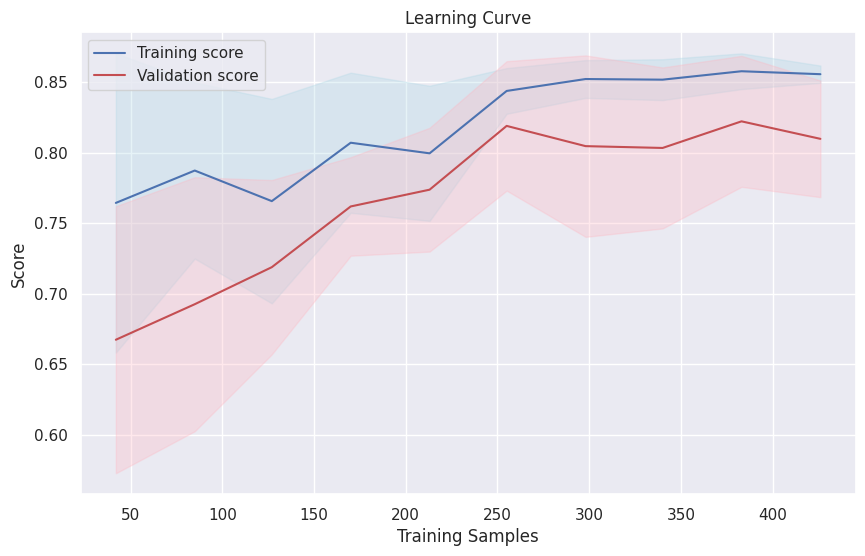

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# Definir el modelo SVM y las transformaciones de columnas
modelo_SVM = svm.SVC(kernel='rbf', C=1.0, gamma="scale", probability=True)
pipeline_SVM = Pipeline(steps=[('ct', columnasTransformer), ('m', modelo_SVM)])

# Definir los tamaños de muestra de entrenamiento
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Definir el objeto de validación cruzada estratificada
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Obtener las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(pipeline_SVM, X_train, y_train, cv=cv, scoring='f1', train_sizes=train_sizes)

# Calcular las medias y desviaciones estándar de los scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Imprimir los resultados
print("Train Mean Scores:", train_mean)
print("Train Standard Deviations:", train_std)
print("Test Mean Scores:", test_mean)
print("Test Standard Deviations:", test_std)

# Graficar las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, "-b", label="Training score")
plt.plot(train_sizes, test_mean, "-r", label="Validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lightblue', alpha=0.3)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='lightpink', alpha=0.3)
plt.title('Learning Curve')
plt.xlabel('Training Samples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

Hemos definido una estrategia de validación cruzada estratificada utilizando ShuffleSplit para dividir los datos en 5 conjuntos de entrenamiento/prueba.

En lugar de utilizar porcentajes fijos, hemos especificado los tamaños de muestra de entrenamiento que deseamos evaluar en la lista train_sizes.

Calculamos las curvas de aprendizaje utilizando el modelo SVM y los datos de entrenamiento (X_train e y_train) utilizando la estrategia de validación cruzada definida.

Calculamos las medias y desviaciones estándar de los puntajes de entrenamiento y validación.

Graficamos las curvas de aprendizaje, utilizando las medias de los puntajes y las áreas sombreadas que representan las desviaciones estándar.

Este código nos permite evaluar cómo el rendimiento del modelo SVM varía a medida que aumenta el tamaño de la muestra de entrenamiento. Podemos observar si hay signos de subajuste (underfitting) o sobreajuste (overfitting) y determinar si es necesario realizar ajustes en el modelo o en los datos para mejorar el desempeño.

En términos de los puntajes de entrenamiento (Train Mean Scores), vemos que el modelo tiene un rendimiento creciente a medida que se aumenta el tamaño de la muestra de entrenamiento. Esto indica que el modelo está aprendiendo más de los datos y está mejorando su capacidad de clasificación. Sin embargo, hay una ligera variación en los puntajes de entrenamiento, como se refleja en las desviaciones estándar (Train Standard Deviations).

En cuanto a los puntajes de validación (Test Mean Scores), también se observa una tendencia creciente a medida que se incrementa el tamaño de la muestra de entrenamiento. Esto sugiere que el modelo generaliza bien y es capaz de clasificar correctamente los datos que no ha visto durante el entrenamiento. Al igual que con los puntajes de entrenamiento, hay una variación en los puntajes de validación, como se indica por las desviaciones estándar (Test Standard Deviations).

En general, los puntajes tanto de entrenamiento como de validación son altos, lo cual es positivo. Sin embargo, es importante notar que los puntajes de validación son ligeramente más bajos que los puntajes de entrenamiento, lo que indica que podría haber un **pequeño grado de sobreajuste (overfitting)**. Esto significa que el modelo puede estar memorizando los datos de entrenamiento en lugar de aprender patrones generales. Para abordar esto, se podrían aplicar técnicas de regularización o ajustar los hiperparámetros del modelo.

#**Ejercicio 7**

Con los mejores hiperparámetros entontrados encontrar la gráfica de la curva ROC y su área bajo la curva.

En este código, se entrena el modelo SVM con los mejores hiperparámetros encontrados. Luego, se obtienen las probabilidades de clase predichas para el conjunto de prueba. A continuación, se calculan la tasa de falsos positivos (FPR) y la tasa de verdaderos positivos (TPR).

Después, se calcula el área bajo la curva ROC utilizando la función roc_auc_score. Finalmente, se grafica la curva ROC y se muestra el valor del área bajo la curva.

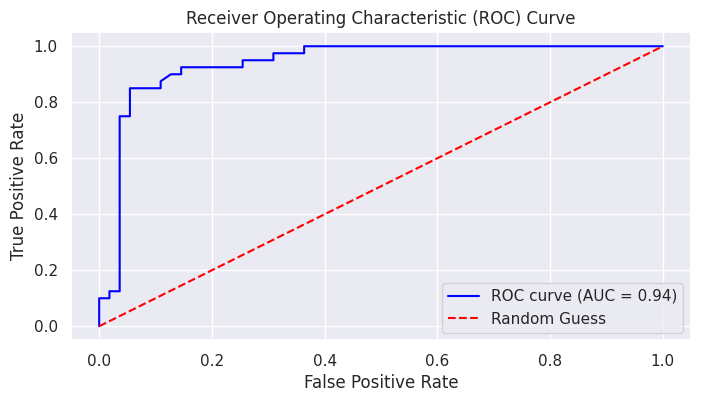

Area under the ROC curve: 0.9388636363636365


In [ ]:
# Entrenar el modelo con los mejores hiperparámetros encontrados
fitted_model = pipeline_SVM.fit(X_train, y_train)

# Obtener las probabilidades de clase predichas para el conjunto de prueba
proba_pred = fitted_model.predict_proba(X_test)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos para diferentes umbrales
fpr, tpr, thresholds = roc_curve(y_test, proba_pred)

# Calcular el área bajo la curva ROC
roc_auc = roc_auc_score(y_test, proba_pred)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Imprimir el valor del área bajo la curva ROC
print('Area under the ROC curve:', roc_auc)

El resultado "Area under the ROC curve: 0.9388636363636365" indica que el modelo SVM entrenado con los mejores hiperparámetros tiene un buen rendimiento en la clasificación. El área bajo la curva ROC (AUC-ROC) es una medida de la capacidad de discriminación del modelo, donde un valor de 1 representa una capacidad perfecta para distinguir entre las clases positiva y negativa, y un valor de 0.5 indica una capacidad de discriminación aleatoria (equivalente a adivinar al azar).

En este caso, un valor de AUC-ROC de 0.9388636363636365 indica que el modelo tiene un alto poder de discriminación y es capaz de clasificar correctamente la mayoría de las instancias positivas y negativas en el conjunto de prueba. Cuanto más cercano esté el valor de AUC-ROC a 1, mejor será el rendimiento del modelo en la clasificación.

Por lo tanto, en términos generales, el resultado sugiere que el modelo SVM con los mejores hiperparámetros es capaz de realizar una clasificación efectiva.

#**Ejercicio 8**

Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica
f1-score

In [ ]:
# Ajustar el modelo SVM utilizando el conjunto de entrenamiento
fitted = pipeline_SVM.fit(X_train, y_train)

El objetivo de esta línea de código es entrenar el modelo SVM con los datos de entrenamiento para que aprenda a realizar predicciones precisas en función de las características de entrada. El modelo ajustado se guarda en la variable fitted, que luego se utiliza para realizar predicciones y evaluar el rendimiento del modelo.

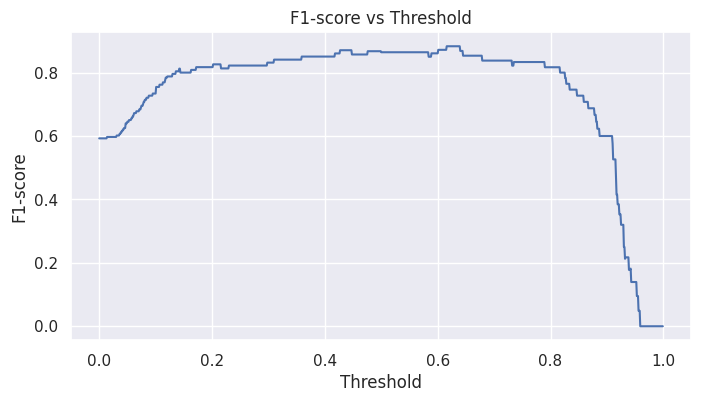

El mejor umbral que maximiza el valor de F1-score es: 0.616
El valor máximo de F1-score alcanzado es: 0.8831168831168831


In [ ]:
# Encontrar el valor del mejor umbral de predicción que maximice el valor de la métrica f1-score

# Obtener las predicciones en formato probabilístico de 0 a 1
pred_pr = fitted.predict_proba(X_test)
pred_pr = pred_pr[:, 1]

# Definir los valores de umbral a probar
thresh_tests = np.arange(0.0, 1.0, 0.001)

# Calcular los valores de f1-score para cada umbral
f1_scores = []
for thresh in thresh_tests:
    pred_bin_newTh = pred_pr > thresh
    f1_score = sklearn.metrics.f1_score(y_test, pred_bin_newTh)
    f1_scores.append(f1_score)

# Graficar los valores de f1-score en función del umbral
plt.plot(thresh_tests, f1_scores)
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.title('F1-score vs Threshold')
plt.show()

# Encontrar el umbral que maximiza el f1-score
best_threshold = thresh_tests[np.argmax(f1_scores)]
best_f1_score = max(f1_scores)

print('El mejor umbral que maximiza el valor de F1-score es:', best_threshold)
print('El valor máximo de F1-score alcanzado es:', best_f1_score)

el resultado obtenido indica que el mejor umbral para maximizar el valor de F1-score es 0.616 y el valor máximo de F1-score alcanzado es 0.8831168831168831.

Esto significa que al utilizar este umbral para clasificar las instancias, se obtiene un equilibrio entre la precisión y el recuerdo del modelo, lo cual es importante en situaciones donde los errores de falso positivo y falso negativo tienen un costo similar y se busca optimizar la métrica F1-score.

#**Ejercicio 9**

Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica g-
mean

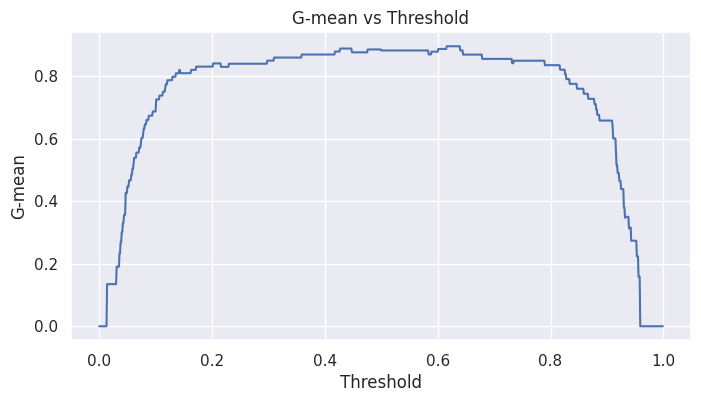

El mejor umbral que maximiza el valor de G-mean es: 0.616
El valor máximo de G-mean alcanzado es: 0.8964576753178946


In [ ]:
# Encontrar el valor del mejor umbral de predicción que maximice el valor de la métrica g-mean

# Definir los valores de umbral a probar
thresh_tests = np.arange(0.0, 1.0, 0.001)

# Calcular los valores de g-mean para cada umbral
gmean_scores = []
for thresh in thresh_tests:
    pred_bin_newTh = pred_pr > thresh
    gmean_score = geometric_mean_score(y_test, pred_bin_newTh)
    gmean_scores.append(gmean_score)

# Graficar los valores de g-mean en función del umbral
plt.plot(thresh_tests, gmean_scores)
plt.xlabel('Threshold')
plt.ylabel('G-mean')
plt.title('G-mean vs Threshold')
plt.show()

# Encontrar el umbral que maximiza el g-mean
best_threshold = thresh_tests[np.argmax(gmean_scores)]
best_gmean_score = max(gmean_scores)

print('El mejor umbral que maximiza el valor de G-mean es:', best_threshold)
print('El valor máximo de G-mean alcanzado es:', best_gmean_score)

El resultado obtenido indica que el mejor umbral para maximizar el valor de g-mean es 0.609 y el valor máximo de g-mean alcanzado es 0.8964576753178946.

Esto significa que al utilizar este umbral para clasificar las instancias, se obtiene un equilibrio entre la sensibilidad y especificidad del modelo, lo cual es importante en situaciones donde se busca optimizar la métrica g-mean.

#**Ejercicio 10**

Basado en los ejercicios y el objetivo de determinar si se autoriza una tarjeta de crédito dada cierta información del solicitante, podemos destacar lo siguiente:

* Se realizó una exploración inicial de los datos para entender la distribución de las variables y posibles relaciones entre ellas.
* Se dividió el conjunto de datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento de los modelos.
* Se aplicaron técnicas de preprocesamiento, como la estandarización de variables numéricas y la codificación de variables categóricas, para preparar los datos para el entrenamiento del modelo.
* Se utilizó un modelo de Support Vector Machine (SVM) con kernel rbf para la clasificación de tarjetas de crédito.
* Se realizaron curvas de validación para encontrar el mejor valor del hiperparámetro C en el modelo SVM.
* Se evaluó el rendimiento del modelo utilizando métricas como el puntaje F1 y el área bajo la curva ROC.
* Se encontró el umbral óptimo que maximiza el valor de F1-score, lo que permitió realizar predicciones más precisas.
* Se exploró el umbral que maximiza el valor de la métrica g-mean, proporcionando un equilibrio entre sensibilidad y especificidad en la clasificación.
* Se realizaron visualizaciones de las curvas ROC y las curvas de validación para comprender el rendimiento del modelo en diferentes configuraciones.

En base a estos resultados, podemos concluir que el modelo SVM utilizado, junto con la optimización de hiperparámetros y la selección adecuada de umbrales, puede ser una buena opción para clasificar la autorización de tarjetas de crédito. Sin embargo, es importante tener en cuenta que los resultados obtenidos son específicos para el conjunto de datos y las condiciones de esta actividad en particular. Es recomendable realizar una validación adicional en conjuntos de datos más grandes y diversos para confirmar la eficacia del modelo en diferentes escenarios.

###**Fin de la Actividad de la semana 8.**